# ***TRABAJO INTEGRADOR ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

# Ignacio Aprile

#Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


A partir del dataset ‘precios-fyh-mercadocentral-bsas-arg-2017-2c2018-‘, dado por la comisión, se efectúan tres procesos de análisis
En el primero, dataset “df_mercado_sinNa” se analiza el precio de cada producto según el mes, discriminando por producto y su disponibilidad según la época
En el segundo, se agrega una nueva columna correspondiente a la madurez de las frutas, con datos simulados, estableciendo los residuos del mercado
Y en el tercero se pretende establecer el precio de las frutas y verduras teniendo en cuenta su estacionalidad
Al estar determinados los valores en dólares no se toma en cuenta una eventual inflación
##1- Ingrese el DATA SET

In [ ]:
# Importar librerías

import numpy as np
from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias
import pandas as pd

df = pd.read_csv('/content/precios-fyh-mercadocentral-bsas-arg-2017-2c2018-.csv', encoding='latin-1')
data_mercado = df.copy()
data = df.copy()



##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [ ]:
#Realizar una visualización de los datos
data.head(10)


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares
5,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Red Delicius,Argentina,1.46,USD,Dolares
6,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Mandarina,Okitzu,Argentina,0.81,USD,Dolares
7,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Melón,Rocio Miel,Argentina,0.85,USD,Dolares
8,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Naranja,Valenciana,Argentina,0.38,USD,Dolares
9,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pera,Williams,Argentina,0.83,USD,Dolares


In [ ]:
data.tail(10)

In [ ]:
# Describir las columnas y tipos de datos que contiene
data.info()

In [ ]:
#Información Estadística del dataset
data.describe()

In [ ]:
data.columns

Index(['pais_id', 'pais', 'mercado', 'año', 'mes', 'producto', 'variedad',
       'origen', 'precio_usd_kg', 'moneda_cod', 'moneda'],
      dtype='object')

In [ ]:
# Visualizar valores únicos

for columna in data.columns:
    print(f'columna: {columna}: los valores únicos son: {data[columna].unique()}')



##3- Aplicar PROCESO DE LIMPIEZA

Se efectúan distintos procesos de limpieza, dependiendo el trabajo a realizar con el dataset, teniendo en cuenta que los estudios sobre el dataset son diferentes y que un proceso de limpieza puede afectar el análisis


##Proceso de limpieza dataframe 'df_mercado_sinNa'

In [ ]:
# eliminar nulos
df_mercado_sinNa = data_mercado.dropna()

# copiar el DataFrame original y eliminar filas con NaN
df_mercado_sinNa = data_mercado.dropna()

# reemplazo la media en los productos por debajo
media_precio_producto = df_mercado_sinNa.groupby('producto')['precio_usd_kg'].mean()
df_mercado_sinNa['precio_usd_kg'].fillna(df_mercado_sinNa['producto'].map(media_precio_producto), inplace=True)

# se esta utilizando para evitar unos warnings molestos
df_mercado_sinNa = df_mercado_sinNa.copy()

# convierte las columnas 'producto', 'variedad' y 'origen' a minúsculas
df_mercado_sinNa['producto'] = df_mercado_sinNa['producto'].str.lower()
df_mercado_sinNa['variedad'] = df_mercado_sinNa['variedad'].str.lower()
df_mercado_sinNa['origen'] = df_mercado_sinNa['origen'].str.lower()

# elimina las filas que presenten 's/especificar' en la columna 'variedad' y 'origen'
df_mercado_sinNa = df_mercado_sinNa[(df_mercado_sinNa['variedad'] != 's/especificar') & (df_mercado_sinNa['origen'] != 's/especificar')]


# diccionario mapea los nombres de los meses a números
meses_numericos = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# agrega una nueva columna 'mesnum'
df_mercado_sinNa['mesnum'] = df_mercado_sinNa['mes'].map(meses_numericos)

print(df_mercado_sinNa[['mes', 'mesnum']].tail(20))

# Visualiza las primeras 20 filas del DataFrame resultante
#df_mercado_sinNa.isnull().sum() #sin nulos
df_mercado_sinNa.head(40) # sin s/especificar


##Proceso de limpieza Dataframe 'df'

In [ ]:
#SE CORRIGE PALTA por el string Palta para que no aparezca como un valor duplicado cuando en realidad refieren a lo mismo
df['producto'] = df['producto'].replace('PALTA', 'Palta')

In [ ]:
#corroborro que el error fue corregido
for column in df.columns:
    print(f'columna: {column}: valores: {df[column].unique()}')

columna: pais_id: valores: [32]
columna: pais: valores: ['Argentina']
columna: mercado: valores: ['Mercado Central de Buenos Aires']
columna: año: valores: [2017 2018]
columna: mes: valores: ['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
columna: producto: valores: ['Anana' 'Banana' 'Pomelo' 'Limón' 'Manzana' 'Mandarina' 'Melón' 'Naranja'
 'Pera' 'Uva' 'Cereza' 'Ciruela' 'Durazno' 'Frutilla' 'Kiwi' 'Frambuesa'
 'Acelga' 'Ajo' 'Albahaca' 'Apio' 'Arveja' 'Batata' 'Berenjena' 'Brocoli'
 'Cebolla' 'Chaucha' 'Choclo' 'Epinaca' 'Lechuga' 'Papa' 'Pepino'
 'Perejil' 'Pimiento' 'Radicheta' 'Remolacha' 'Repollo' 'Tomate'
 'Zanahoria' 'Zapallito' 'Zapallo' 'Palta']
columna: variedad: valores: ['Perola' 'Cavdich' 'Star Ruby' 'Eureka' 'Granny Smith' 'Red Delicius'
 'Okitzu' 'Rocio Miel' 'Valenciana' 'Williams' 'Moscat.Bca' 'Bing'
 'Blackamber' 'Eleg. Lady' 's/especificar' 'Mdo. Chino' 'Arapey'
 'Vta.Med.La' 'Colorada' 'Esmeralda' 

In [ ]:
# Normalizar convirtiendo todos los valores a minúsculas
data['producto'] = data['producto'].str.lower()


In [ ]:
#corroborro que el error fue corregido
for column in df.columns:
    print(f'columna: {column}: valores: {df[column].unique()}')

In [ ]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64


In [ ]:
fila_con_nulo = df[df['precio_usd_kg'].isnull()].head(1)
print(fila_con_nulo)

    pais_id       pais                          mercado   año    mes  \
16       32  Argentina  Mercado Central de Buenos Aires  2017  Enero   

     producto       variedad     origen  precio_usd_kg moneda_cod   moneda  
16  Frambuesa  s/especificar  Argentina            NaN        USD  Dolares  


In [ ]:
#reemplazo los valores nulos de "precio_usd_kg" por la media de precio usd de cada producto
media_precio_producto = df.groupby('producto')['precio_usd_kg'].mean()

In [ ]:
media_precio_producto

producto
Acelga       0.455263
Ajo          2.565263
Albahaca     0.372105
Anana        1.380556
Apio         1.167778
Arveja       1.483684
Banana       0.764000
Batata       0.487368
Berenjena    0.566316
Brocoli      1.375263
Cebolla      0.516471
Cereza       5.523333
Chaucha      1.244211
Choclo       0.691053
Ciruela      1.850000
Durazno      2.219231
Epinaca      1.198947
Frambuesa    9.664000
Frutilla     4.293000
Kiwi         2.014500
Lechuga      0.793684
Limón        0.815500
Mandarina    0.645000
Manzana      1.392187
Melón        1.152105
Naranja      0.515500
Palta        3.661250
Papa         0.385789
Pepino       0.566842
Pera         0.966000
Perejil      0.964211
Pimiento     1.368421
Pomelo       0.774444
Radicheta    1.411053
Remolacha    0.317368
Repollo      0.285789
Tomate       1.185366
Uva          1.797059
Zanahoria    0.516316
Zapallito    0.542632
Zapallo      0.410526
Name: precio_usd_kg, dtype: float64

In [ ]:
df['precio_usd_kg'].fillna(df['producto'].map(media_precio_producto), inplace=True)

In [ ]:
fila_a_verificar = df.iloc[16]
fila_a_verificar

pais_id                                       32
pais                                   Argentina
mercado          Mercado Central de Buenos Aires
año                                         2017
mes                                        Enero
producto                               Frambuesa
variedad                           s/especificar
origen                                 Argentina
precio_usd_kg                              9.664
moneda_cod                                   USD
moneda                                   Dolares
Name: 16, dtype: object

In [ ]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

pais_id          0
pais             0
mercado          0
año              0
mes              0
producto         0
variedad         0
origen           0
precio_usd_kg    0
moneda_cod       0
moneda           0
dtype: int64


In [ ]:
resumen_estadistico = df.describe()
resumen_estadistico

,pais_id,año,precio_usd_kg
count,828.0,828.000000,828.000000
mean,32.0,2017.376812,1.368749
std,0.0,0.484880,1.674140
min,32.0,2017.000000,0.000000
25%,32.0,2017.000000,0.477500
50%,32.0,2017.000000,0.890000
75%,32.0,2018.000000,1.512500
max,32.0,2018.000000,11.230000


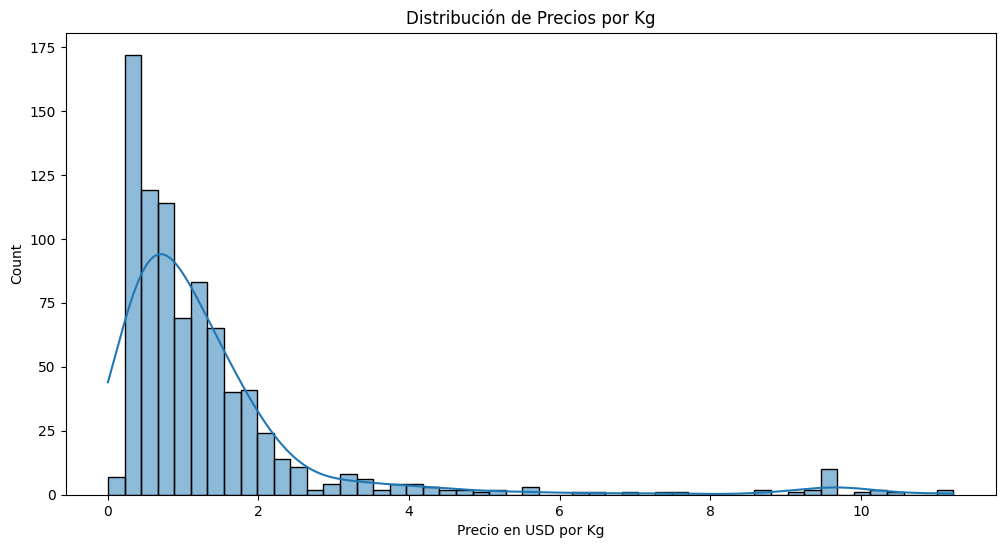

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['precio_usd_kg'], kde=True)
plt.xlabel('Precio en USD por Kg')
plt.title('Distribución de Precios por Kg')
plt.show()

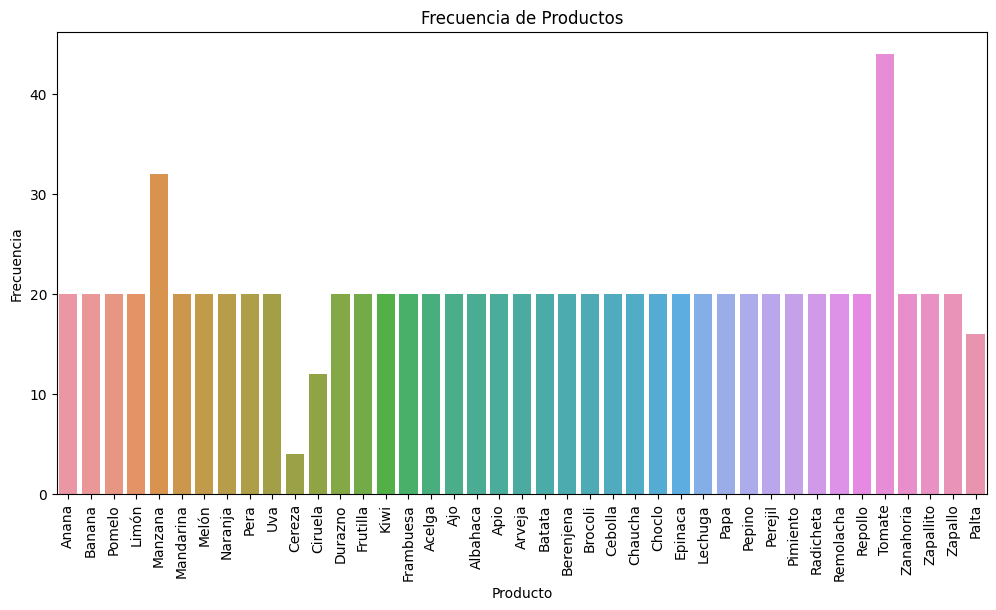

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='producto')
plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Productos')
plt.show()

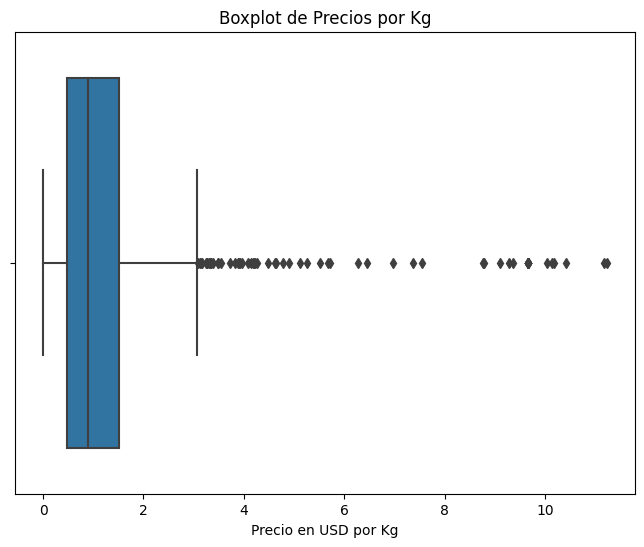

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='precio_usd_kg')
plt.xlabel('Precio en USD por Kg')
plt.title('Boxplot de Precios por Kg')
plt.show()

In [ ]:
tabla_frecuencia_producto = df['producto'].value_counts()
tabla_frecuencia_producto

Tomate       44
Manzana      32
Anana        20
Pepino       20
Brocoli      20
Cebolla      20
Chaucha      20
Choclo       20
Epinaca      20
Lechuga      20
Papa         20
Pimiento     20
Perejil      20
Batata       20
Radicheta    20
Remolacha    20
Repollo      20
Zanahoria    20
Zapallito    20
Zapallo      20
Berenjena    20
Arveja       20
Banana       20
Limón        20
Albahaca     20
Ajo          20
Acelga       20
Frambuesa    20
Kiwi         20
Frutilla     20
Durazno      20
Apio         20
Pomelo       20
Uva          20
Pera         20
Naranja      20
Melón        20
Mandarina    20
Palta        16
Ciruela      12
Cereza        4
Name: producto, dtype: int64

In [ ]:
df.head()


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


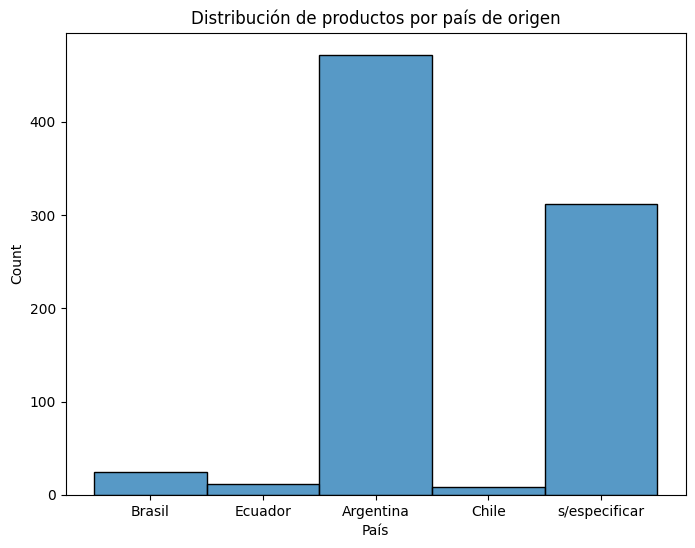

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['origen'], bins=10, kde=False)
plt.xlabel('País')
plt.title('Distribución de productos por país de origen')
plt.show()

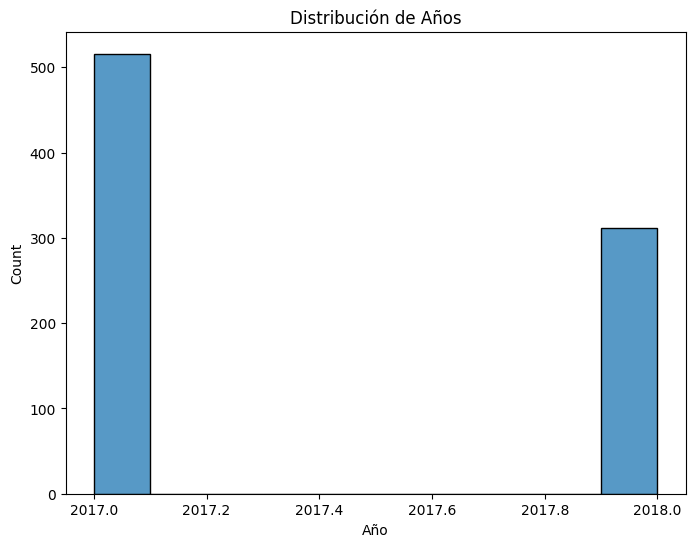

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['año'], bins=10, kde=False)
plt.xlabel('Año')
plt.title('Distribución de Años')
plt.show()

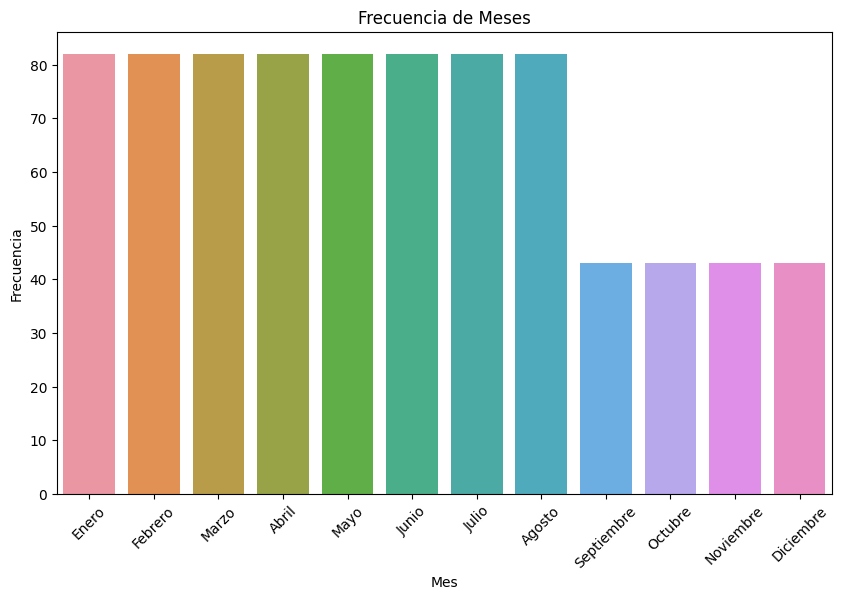

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Meses')
plt.show()

In [ ]:
#creo una nueva columna, fecha, que contenga al mes y el año
meses_numericos = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Septiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

df['mes'] = df['mes'].map(meses_numericos)

In [ ]:
df['fecha'] = df['año'].astype(str) + '-' + df['mes'] + '-01'
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

df.head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,fecha
0,32,Argentina,Mercado Central de Buenos Aires,2017,01,Anana,Perola,Brasil,1.22,USD,Dolares,2017-01-01
1,32,Argentina,Mercado Central de Buenos Aires,2017,01,Banana,Cavdich,Ecuador,0.53,USD,Dolares,2017-01-01
2,32,Argentina,Mercado Central de Buenos Aires,2017,01,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,2017-01-01
3,32,Argentina,Mercado Central de Buenos Aires,2017,01,Limón,Eureka,Argentina,1.52,USD,Dolares,2017-01-01
4,32,Argentina,Mercado Central de Buenos Aires,2017,01,Manzana,Granny Smith,Argentina,1.84,USD,Dolares,2017-01-01


In [ ]:
df['producto_codigo'] = pd.factorize(df['producto'])[0]

df.head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,fecha,producto_codigo
0,32,Argentina,Mercado Central de Buenos Aires,2017,01,Anana,Perola,Brasil,1.22,USD,Dolares,2017-01-01,0
1,32,Argentina,Mercado Central de Buenos Aires,2017,01,Banana,Cavdich,Ecuador,0.53,USD,Dolares,2017-01-01,1
2,32,Argentina,Mercado Central de Buenos Aires,2017,01,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,2017-01-01,2
3,32,Argentina,Mercado Central de Buenos Aires,2017,01,Limón,Eureka,Argentina,1.52,USD,Dolares,2017-01-01,3
4,32,Argentina,Mercado Central de Buenos Aires,2017,01,Manzana,Granny Smith,Argentina,1.84,USD,Dolares,2017-01-01,4


In [ ]:
mask = df['producto'] == 'Banana'
df[mask].head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,fecha,producto_codigo
1,32,Argentina,Mercado Central de Buenos Aires,2017,01,Banana,Cavdich,Ecuador,0.53,USD,Dolares,2017-01-01,1
44,32,Argentina,Mercado Central de Buenos Aires,2017,02,Banana,Cavdich,Ecuador,0.87,USD,Dolares,2017-02-01,1
87,32,Argentina,Mercado Central de Buenos Aires,2017,03,Banana,Cavdich,Ecuador,0.89,USD,Dolares,2017-03-01,1
130,32,Argentina,Mercado Central de Buenos Aires,2017,04,Banana,Cavdich,Ecuador,0.86,USD,Dolares,2017-04-01,1
173,32,Argentina,Mercado Central de Buenos Aires,2017,05,Banana,Cavdich,Ecuador,0.90,USD,Dolares,2017-05-01,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pais_id          828 non-null    int64         
 1   pais             828 non-null    object        
 2   mercado          828 non-null    object        
 3   año              828 non-null    int64         
 4   mes              828 non-null    object        
 5   producto         828 non-null    object        
 6   variedad         828 non-null    object        
 7   origen           828 non-null    object        
 8   precio_usd_kg    828 non-null    float64       
 9   moneda_cod       828 non-null    object        
 10  moneda           828 non-null    object        
 11  fecha            828 non-null    datetime64[ns]
 12  producto_codigo  828 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 84.2+ KB


In [ ]:
#creo una columna con datos simulados correspondientes a la madurez de las frutas
df['dias_de_madurez'] = np.random.randint(1, 8, size=len(df))

##Proceso de limpieza dataframe 'data'

In [ ]:
# Normalizar convirtiendo todos los valores a minúsculas
data['producto'] = data['producto'].str.lower()


In [ ]:
# Detectar datos nulos
nul=data.isnull().sum()
print('los nulos son',nul)

los nulos son pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64


Se observa que la columna precio_usd_kg posee valores nulos que deben ser corregidos.
A tal fin es necesario reemplazar por la media discriminada por producto

In [ ]:
# Calcular la media por producto
medias_por_producto = data.groupby('producto')['precio_usd_kg'].mean()

# Reemplazar los valores nulos con las medias correspondientes
data['precio_usd_kg'] = data.apply(lambda row: medias_por_producto[row['producto']] if pd.isnull(row['precio_usd_kg']) else row['precio_usd_kg'], axis=1)



In [ ]:
# Comprobación
nul=data.isnull().sum()
print('los nulos son',nul)

los nulos son pais_id          0
pais             0
mercado          0
año              0
mes              0
producto         0
variedad         0
origen           0
precio_usd_kg    0
moneda_cod       0
moneda           0
dtype: int64


Las columnas 'pais', 'pais_id', 'mercado', 'moneda_cod' y 'moneda' poseen valores únicos que carecen de relevancia, por lo que se elminan las mismas para el análisis

In [ ]:
data = data.drop(['pais', 'pais_id', 'mercado', 'moneda_cod', 'moneda'], axis=1)


Atento la estacionalidad del precio de la fruta, se crea una nueva columna asignando valor numérico al dato categórico "mes" a fin de su procesamiento

In [ ]:
data['codigo_mes'] = data['mes'].replace({
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
})


In [ ]:
# A fin de graficar la relación entre precio y producto, se agrega una columna "producto_encoded" que asigna un valor numérico a los datos categóricos de la columna producto

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

le = LabelEncoder()
data['producto_encoded'] = le.fit_transform(data['producto'])



In [ ]:
data.head()

,año,mes,producto,variedad,origen,precio_usd_kg,codigo_mes,producto_encoded
0,2017,Enero,anana,Perola,Brasil,1.22,1,3
1,2017,Enero,banana,Cavdich,Ecuador,0.53,1,6
2,2017,Enero,pomelo,Star Ruby,Argentina,0.86,1,32
3,2017,Enero,limón,Eureka,Argentina,1.52,1,21
4,2017,Enero,manzana,Granny Smith,Argentina,1.84,1,23


##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

##Data Frame 'df_mercado_sinNa'

# 4.1-Regresión lineal

Análisis de el precio de cada producto según el mes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

anana - MSE: 0.17
anana - R2: 0.00


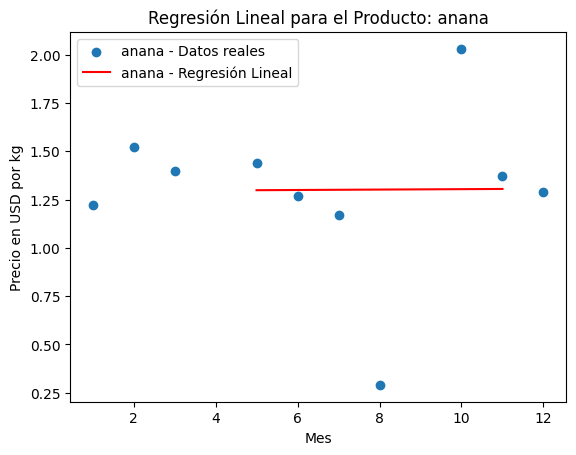

banana - MSE: 0.01
banana - R2: 0.10


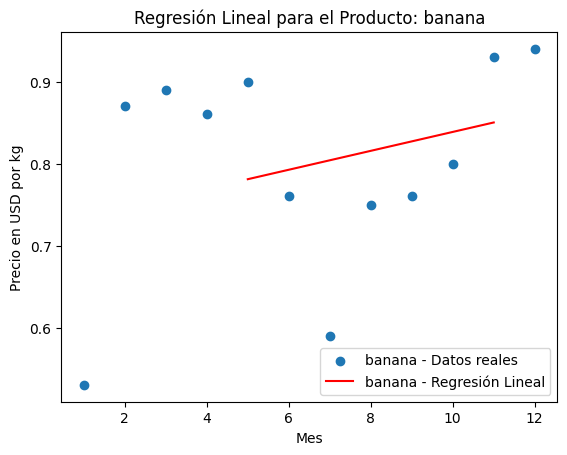

pomelo - MSE: 0.03
pomelo - R2: 0.30


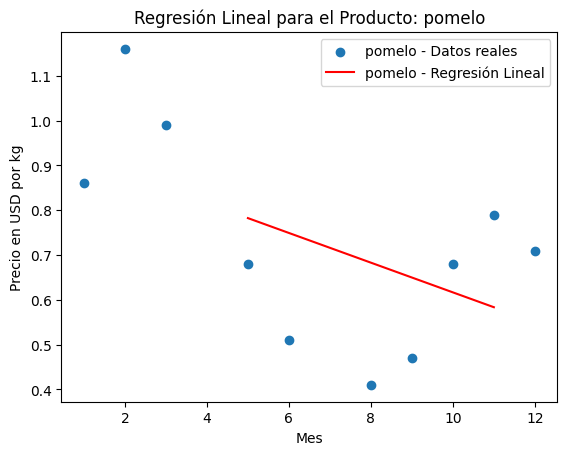

limón - MSE: 0.11
limón - R2: 0.07


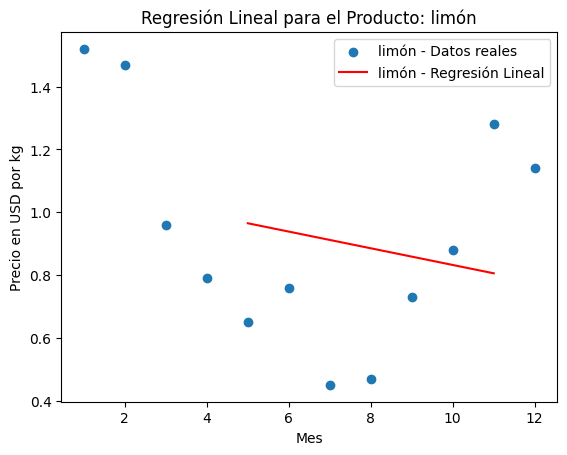

manzana - MSE: 0.14
manzana - R2: 0.09


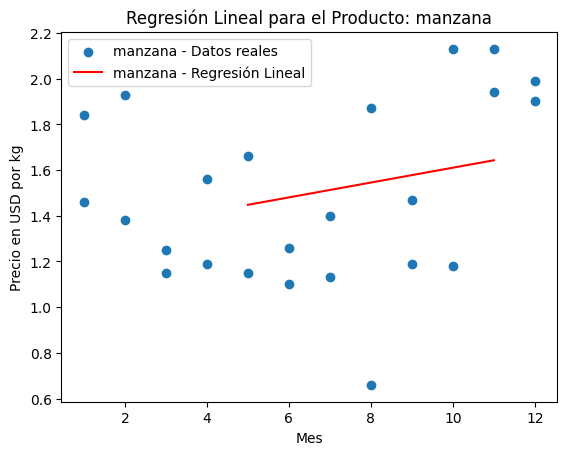

mandarina - MSE: 0.01
mandarina - R2: 0.19


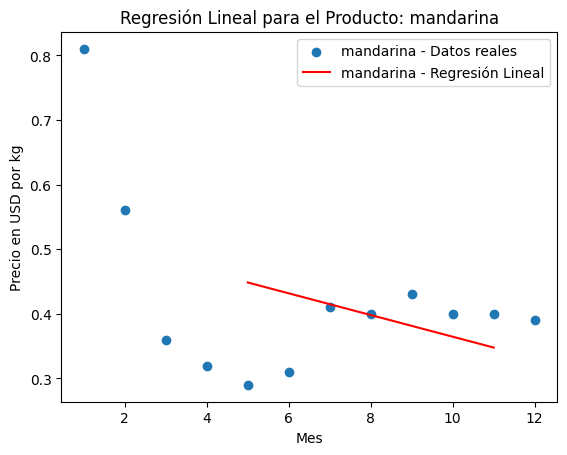

melón - MSE: 0.01
melón - R2: 0.37


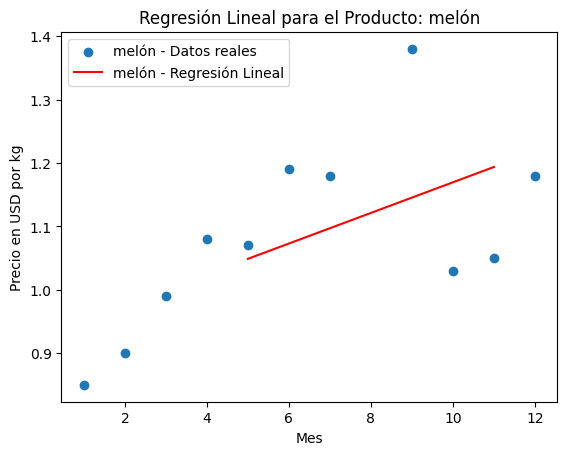

naranja - MSE: 0.00
naranja - R2: 0.00


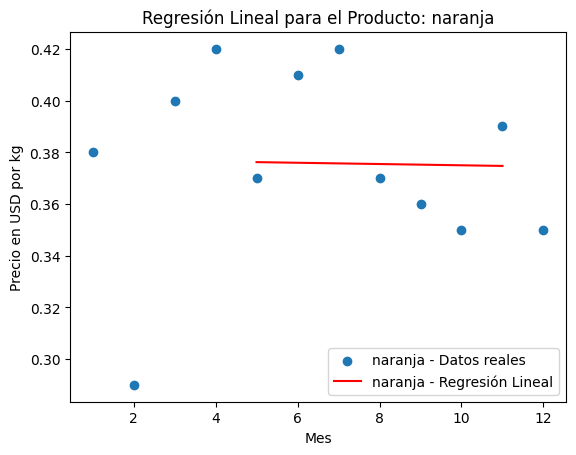

pera - MSE: 0.03
pera - R2: 0.67


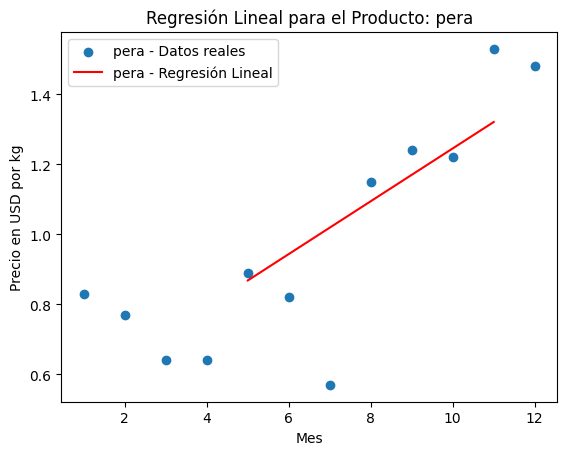

uva - MSE: 0.20
uva - R2: 0.69


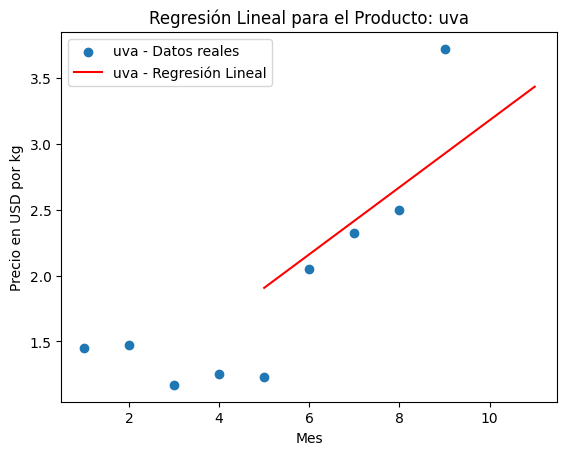

cereza - MSE: 0.08
cereza - R2: 0.97


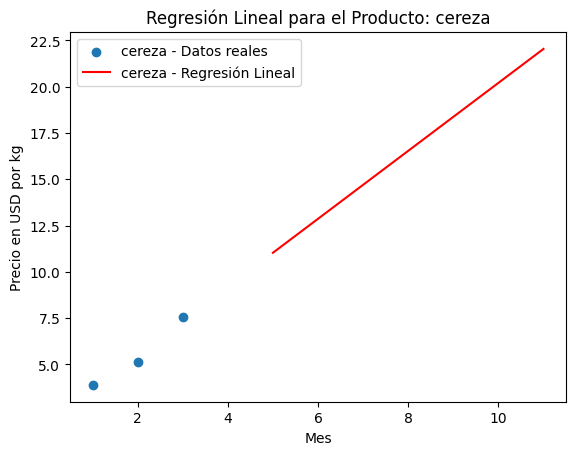

ciruela - MSE: 0.02
ciruela - R2: 0.17


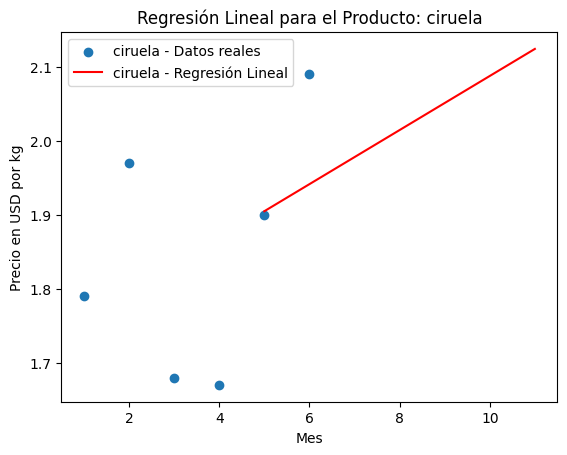

durazno - MSE: 0.75
durazno - R2: 0.00


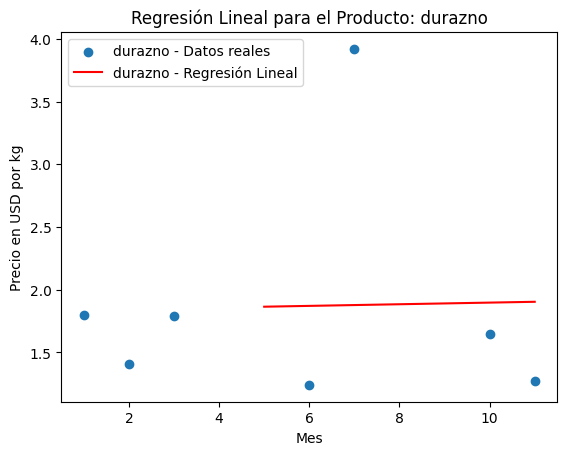

ajo - MSE: 0.01
ajo - R2: 0.56


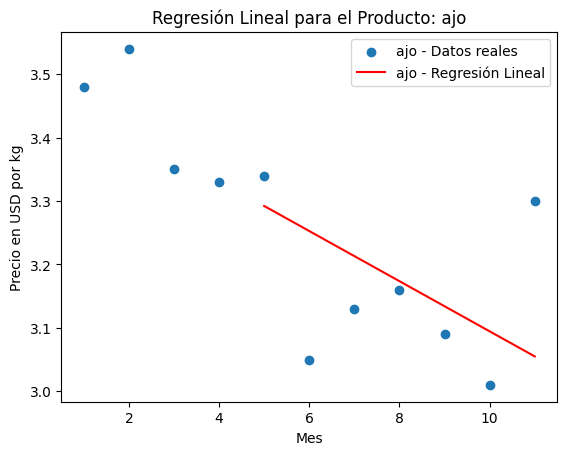

batata - MSE: 0.00
batata - R2: 0.71


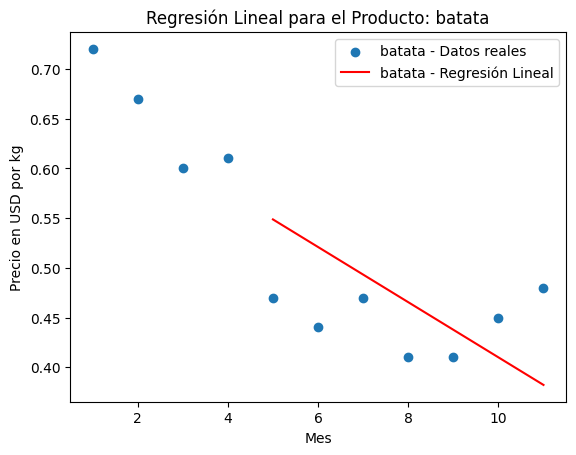

berenjena - MSE: 0.01
berenjena - R2: 0.67


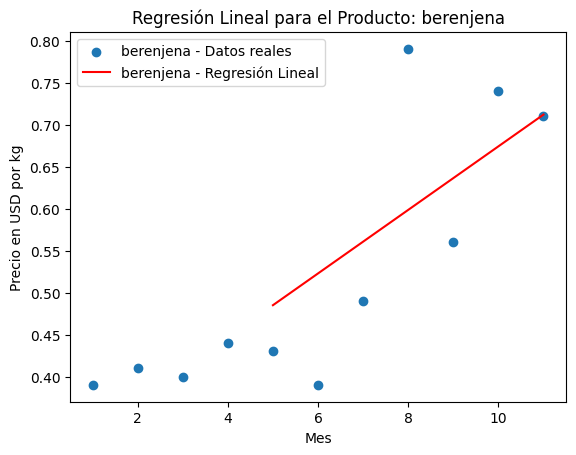

cebolla - MSE: 0.01
cebolla - R2: 0.35


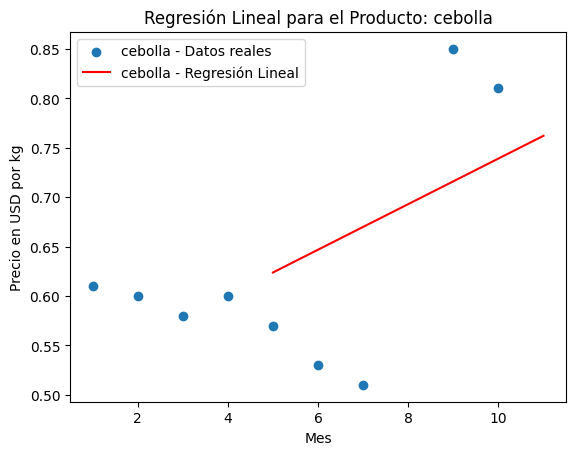

chaucha - MSE: 0.07
chaucha - R2: 0.03


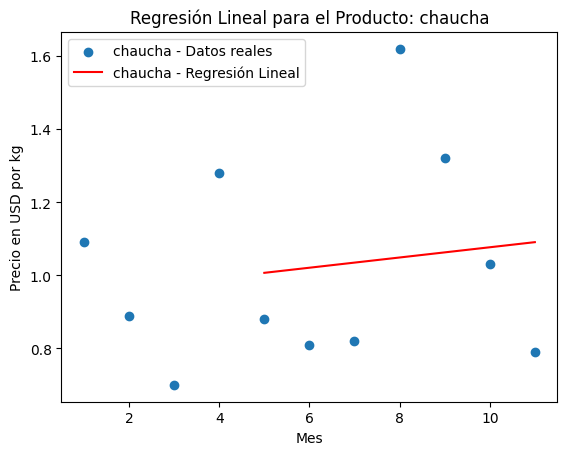

choclo - MSE: 0.02
choclo - R2: 0.28


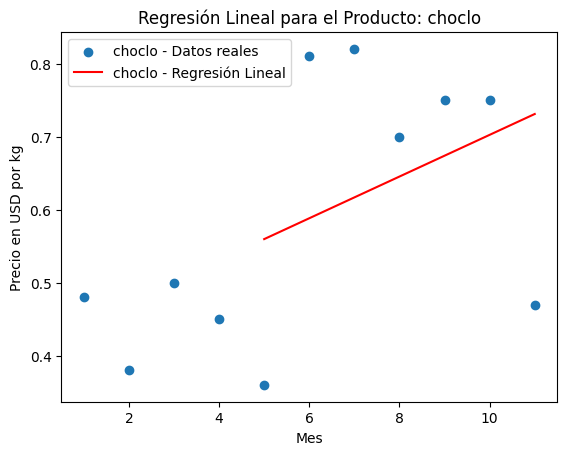

lechuga - MSE: 0.05
lechuga - R2: 0.34


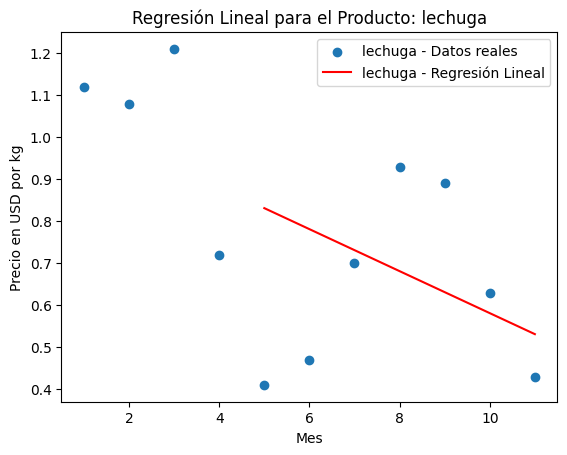

papa - MSE: 0.01
papa - R2: 0.10


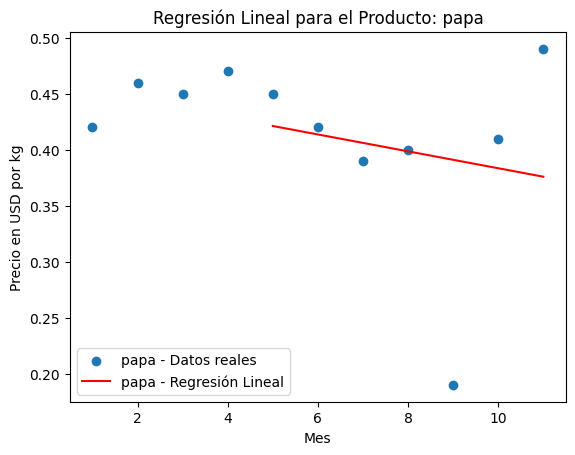

pimiento - MSE: 0.08
pimiento - R2: 0.06


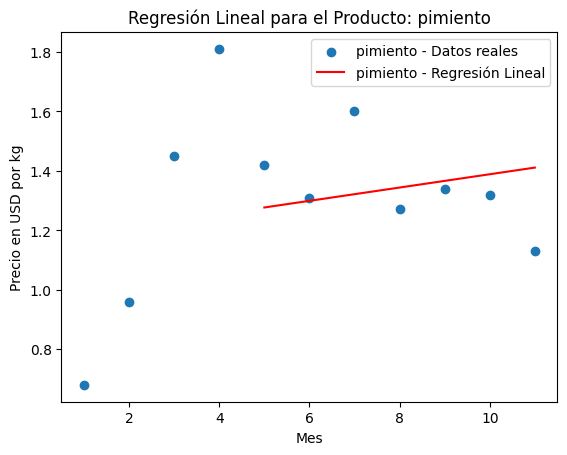

radicheta - MSE: 0.07
radicheta - R2: 0.15


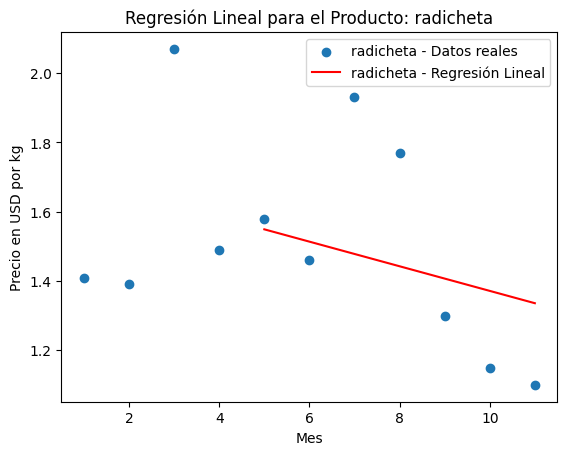

repollo - MSE: 0.01
repollo - R2: 0.19


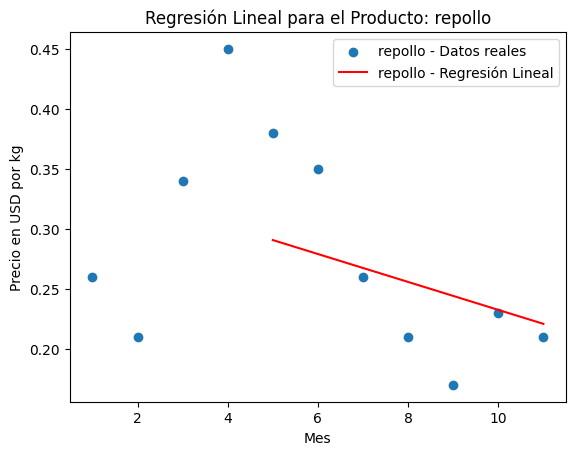

tomate - MSE: 0.46
tomate - R2: 0.17


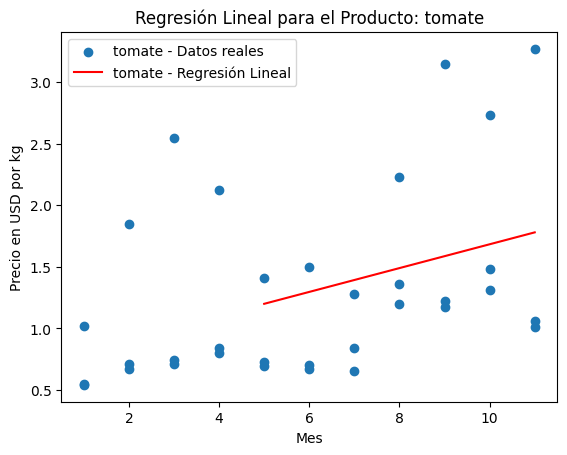

zanahoria - MSE: 0.01
zanahoria - R2: 0.10


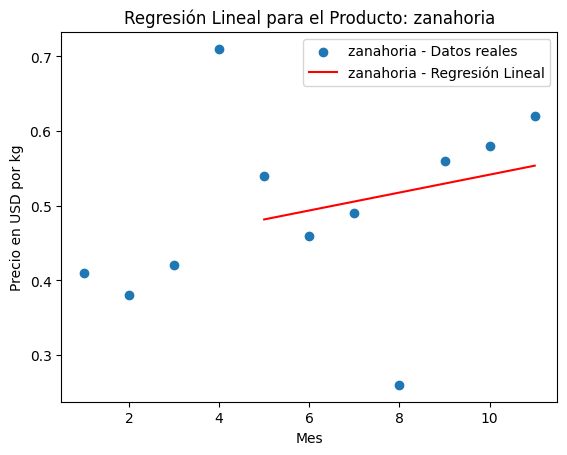

zapallito - MSE: 0.01
zapallito - R2: 0.60


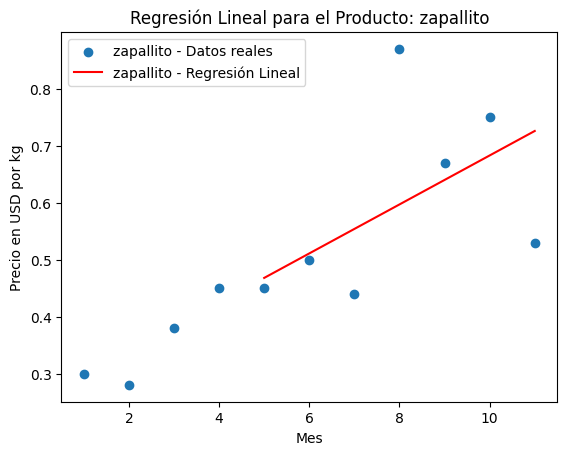

zapallo - MSE: 0.05
zapallo - R2: 0.14


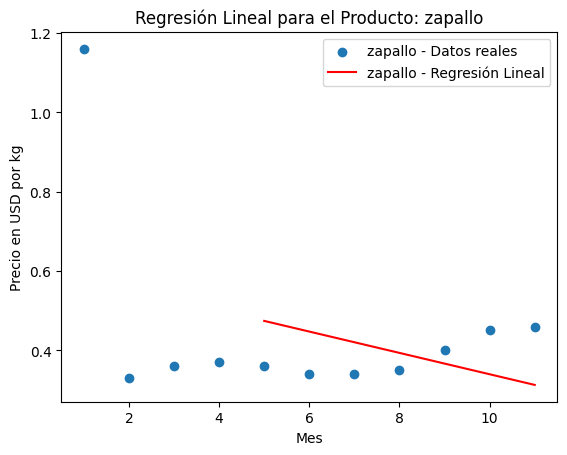

palta - MSE: 0.40
palta - R2: 0.53


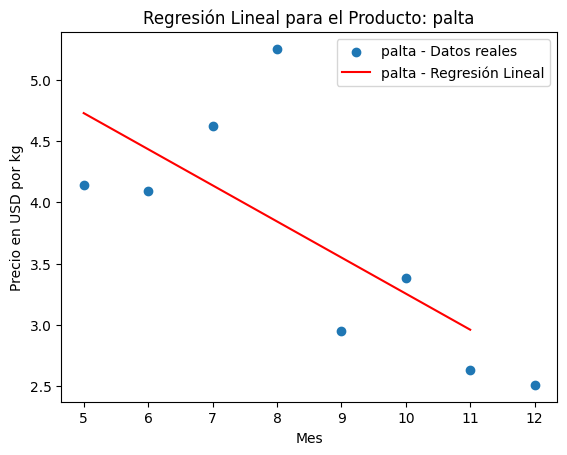

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt


# obtener la lista de productos únicos en tu DataFrame
productos_unicos = df_mercado_sinNa['producto'].unique()

# crear un diccionario para almacenar los modelos de regresión lineal y las predicciones por producto
resultados = {}

# filtrar y predecir para cada producto único
for producto in productos_unicos:
    producto_df = df_mercado_sinNa[df_mercado_sinNa['producto'] == producto]

    if not producto_df.empty:  # verificar si el DataFrame no está vacío
        # crear un modelo de regresión lineal
        model = LinearRegression()

        # etiqueta X y etiqueta y
        X = producto_df[['mesnum']]
        y = producto_df['precio_usd_kg']


        # entrenar el modelo
        model.fit(X, y)

        # realizar predicciones para los meses futuros  4, 8, 11
        meses_a_predecir = np.array([5, 8, 11]).reshape(-1, 1)
        precios_prediccion = model.predict(meses_a_predecir)

        # calcular las métricas de error y rendimiento
        mse = mean_squared_error(y, model.predict(X))
        r2 = r2_score(y, model.predict(X))

        # almacenar el modelo y las predicciones en el diccionario
        resultados[producto] = {
            'model': model,
            'meses': [5, 8, 11],  # meses que se predijeron
            'precios_prediccion': precios_prediccion,
            'precioReal':y,
            'mesesReal':X,
            'mse': mse,
            'r2': r2
        }

# grafico x cada producto
for producto, resultado in resultados.items():
    plt.scatter(resultado['mesesReal'], resultado['precioReal'], label=f'{producto} - Datos reales')
    plt.plot(resultado['meses'], resultado['precios_prediccion'], label=f'{producto} - Regresión Lineal', color='red')
    plt.xlabel('Mes')
    plt.ylabel('Precio en USD por kg')
    plt.legend()
    plt.title(f'Regresión Lineal para el Producto: {producto}')
    # imprimir el MSE y R2
    print(f'{producto} - MSE: {resultado["mse"]:.2f}')
    print(f'{producto} - R2: {resultado["r2"]:.2f}')
    plt.show()


Analisis

 Manzanas - MSE de 0.14, las predicciones del modelo están relativamente cerca de los valores reales. El R2 de 0.09, nos indica que el modelo no explica bien la variabilidad. No es un modelo efectivo para aplicar.

 Palta - MSE de 0.40, siguen siendo razonables aunque están más lejos de los valores reales, El R2 de 0.53, el modelo se ajusta bien a los datos. Es un modelo efectivo para aplicar.

 zapallito - MSE: 0.01, las predicciones son muy precisas. el R2 0.60, el modelo se ajusta muy bien a los datos. Es un modelo efectivo para aplicar a los zapallitos.

 tomate - MSE: 0.46 tiene un error bastante alto pero aceptable. El R2 de 0.17, nos dice que tiene un ajuste limitado. No es un modelo efectivo para aplicar

#4.2- Regresión Logística

Análisis de la disponibilidad de la fruta/ verdura en el año

Resultados para el producto 'anana':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está PRESENTE



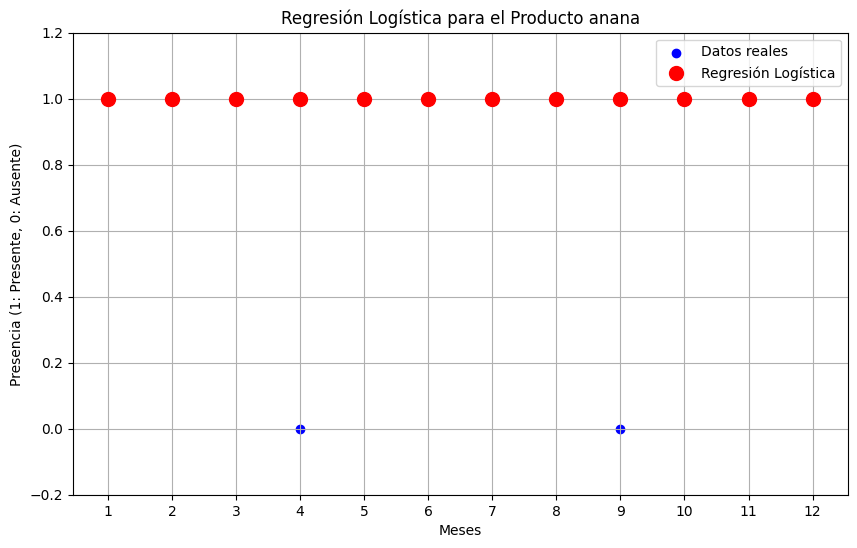


Resultados para el producto 'pomelo':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está PRESENTE



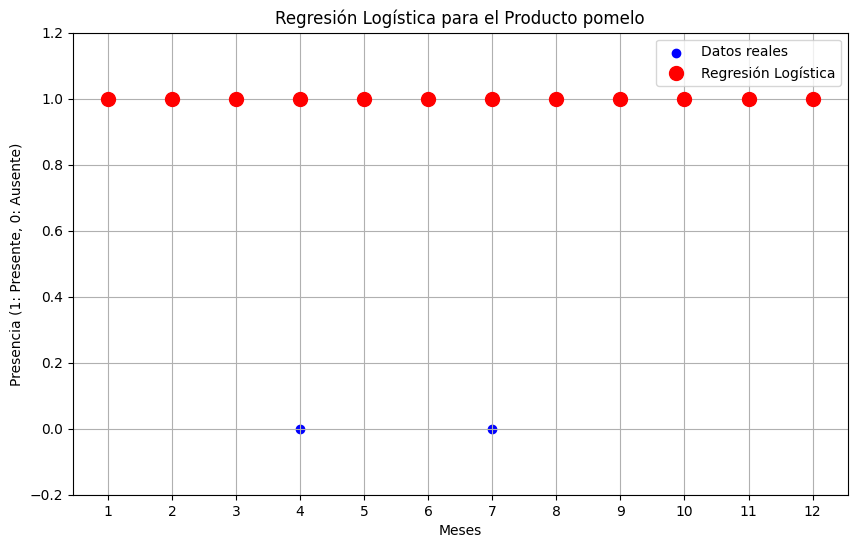


Resultados para el producto 'melón':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está PRESENTE



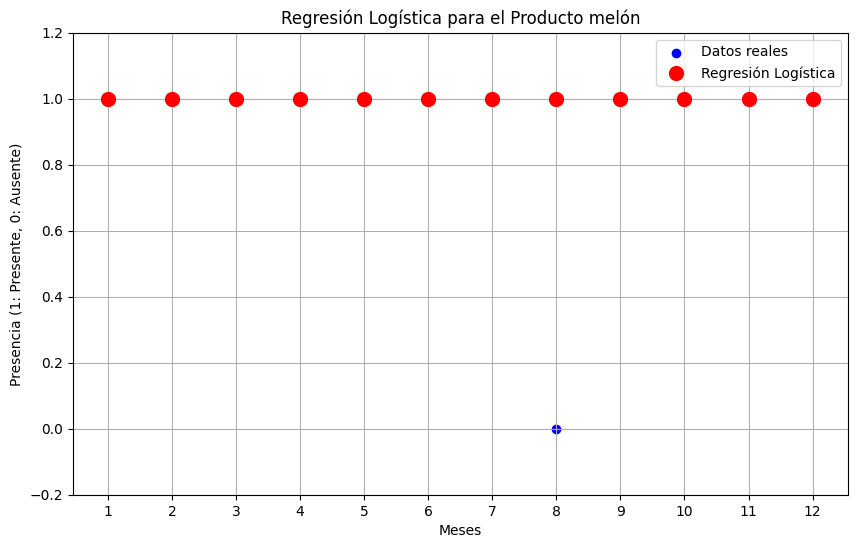


Resultados para el producto 'uva':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



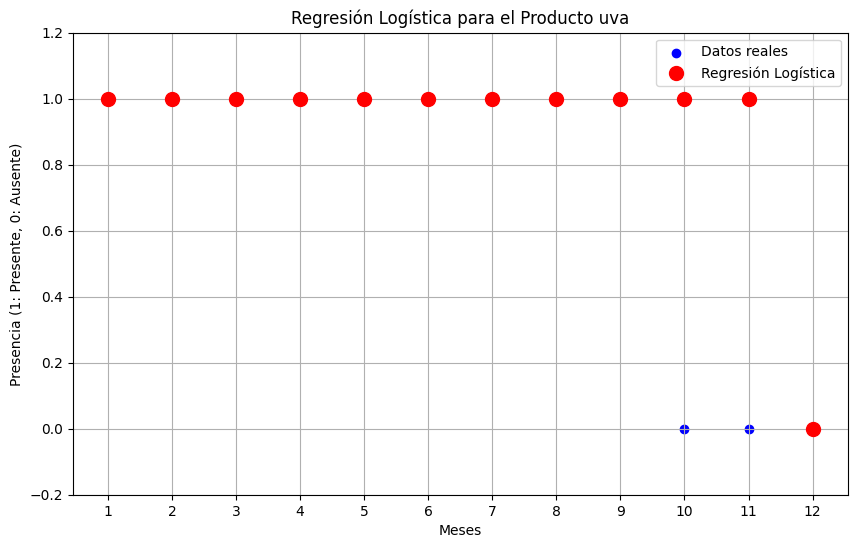


Resultados para el producto 'cereza':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está AUSENTE
En el mes 5, estimamos que está AUSENTE
En el mes 6, estimamos que está AUSENTE
En el mes 7, estimamos que está AUSENTE
En el mes 8, estimamos que está AUSENTE
En el mes 9, estimamos que está AUSENTE
En el mes 10, estimamos que está AUSENTE
En el mes 11, estimamos que está AUSENTE
En el mes 12, estimamos que está AUSENTE



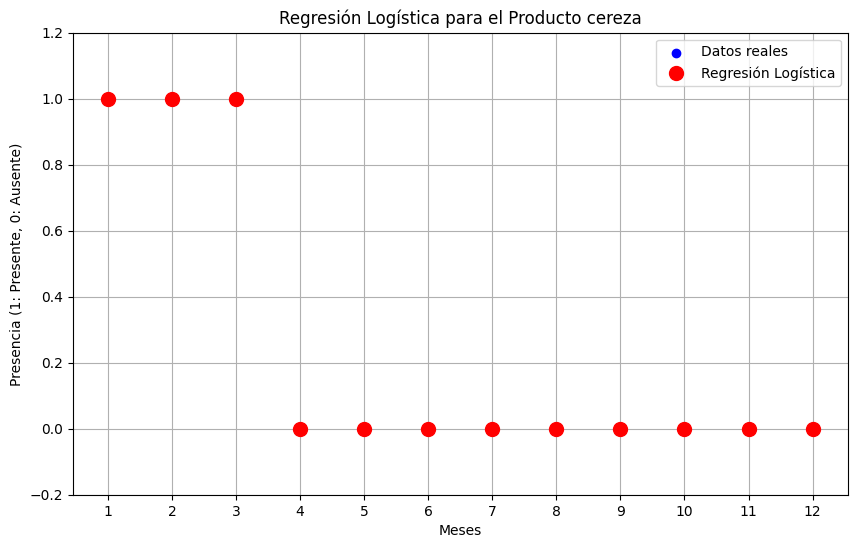


Resultados para el producto 'ciruela':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está AUSENTE
En el mes 6, estimamos que está AUSENTE
En el mes 7, estimamos que está AUSENTE
En el mes 8, estimamos que está AUSENTE
En el mes 9, estimamos que está AUSENTE
En el mes 10, estimamos que está AUSENTE
En el mes 11, estimamos que está AUSENTE
En el mes 12, estimamos que está AUSENTE



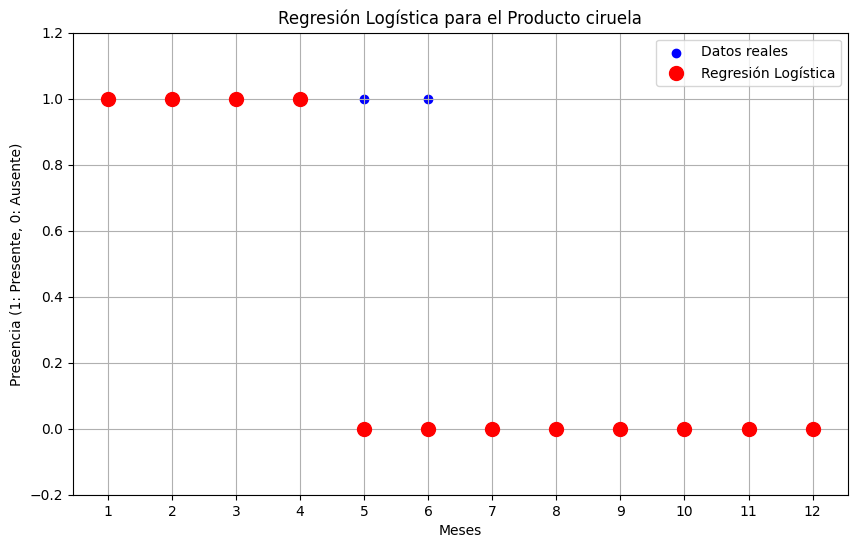


Resultados para el producto 'durazno':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está AUSENTE
En el mes 9, estimamos que está AUSENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



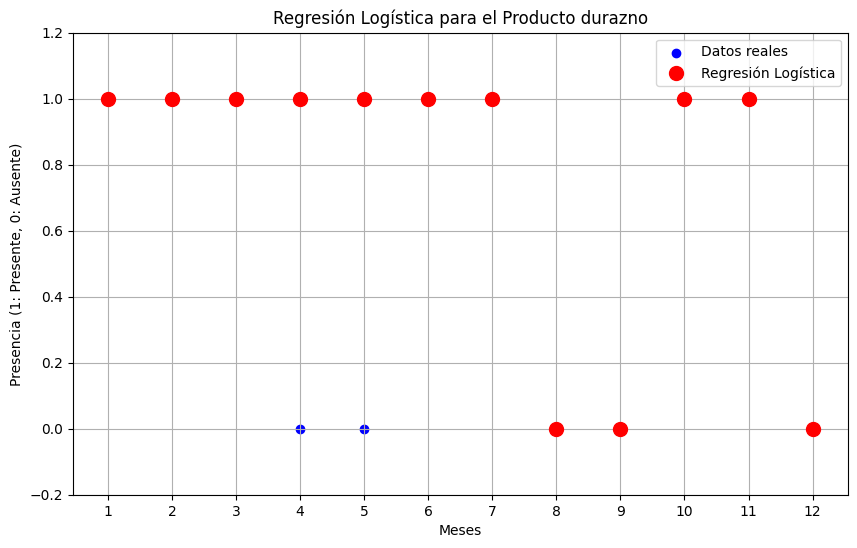


Resultados para el producto 'ajo':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



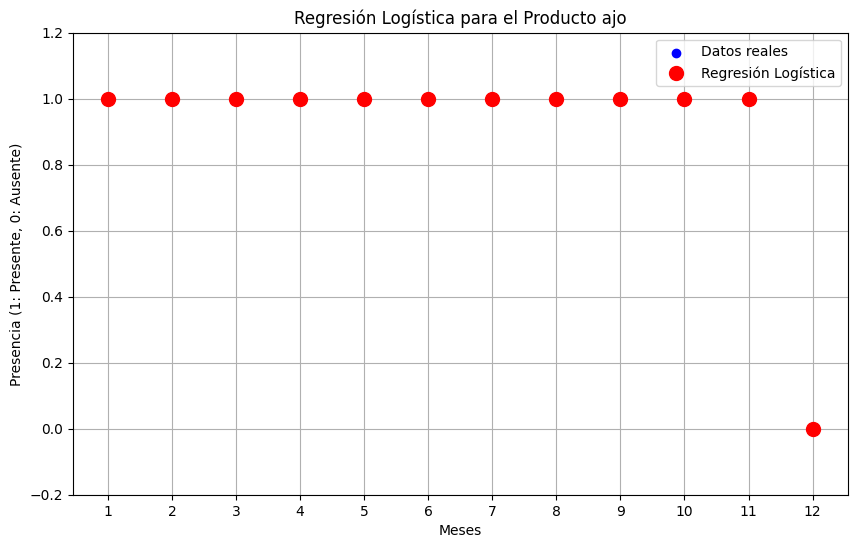


Resultados para el producto 'batata':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



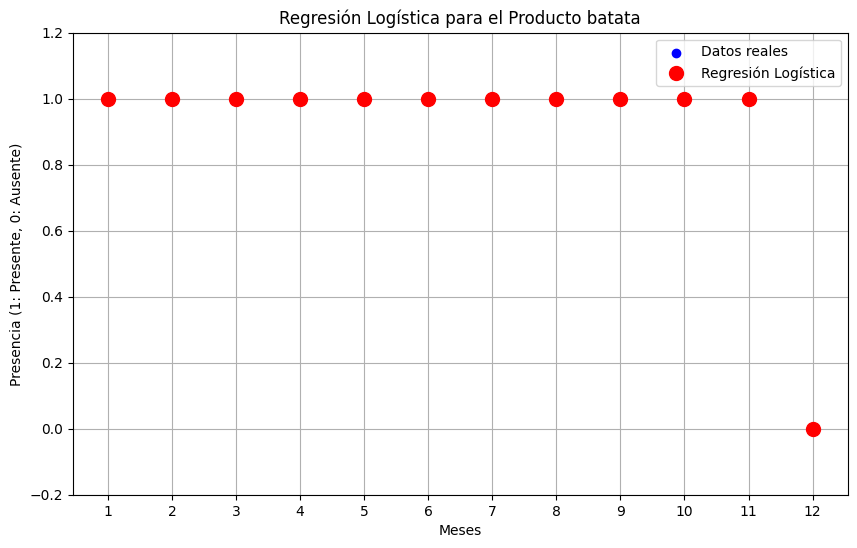


Resultados para el producto 'berenjena':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



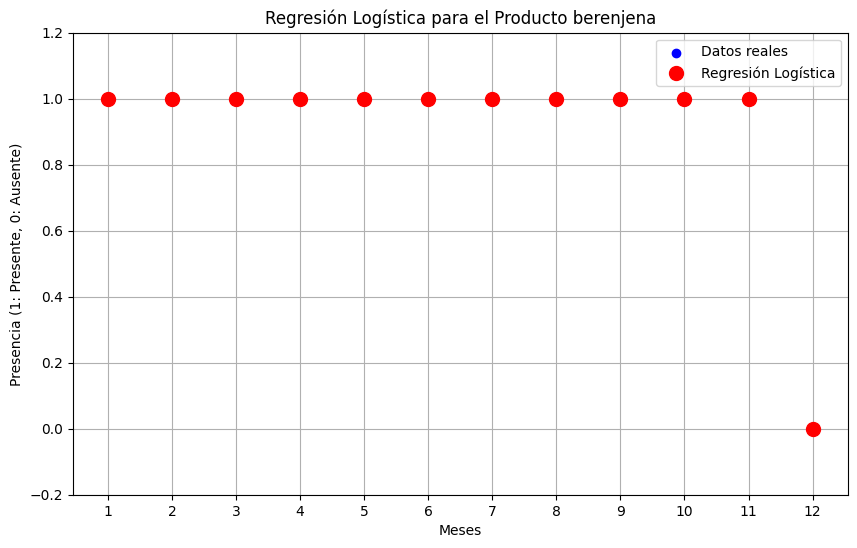


Resultados para el producto 'cebolla':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



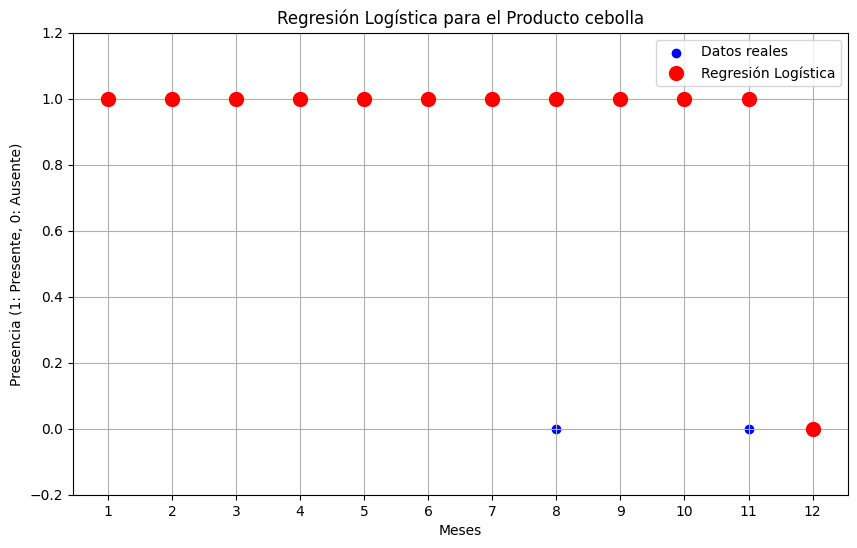


Resultados para el producto 'chaucha':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



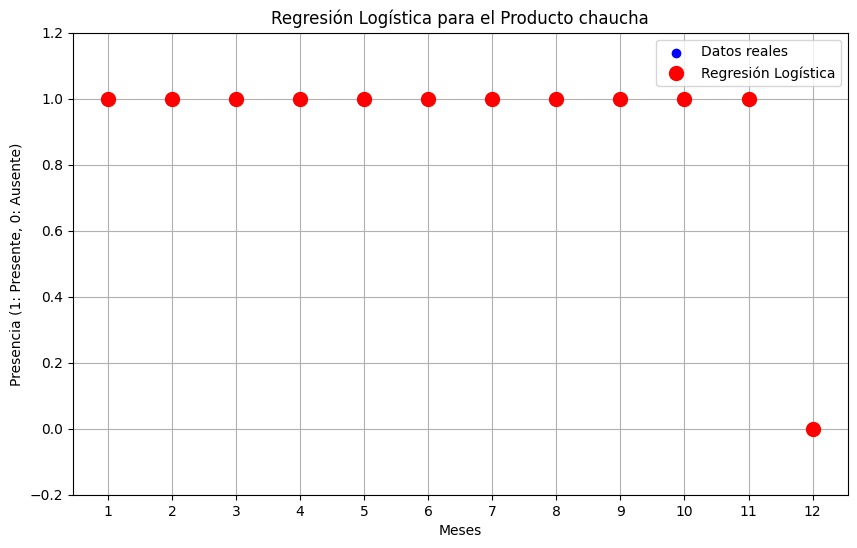


Resultados para el producto 'choclo':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



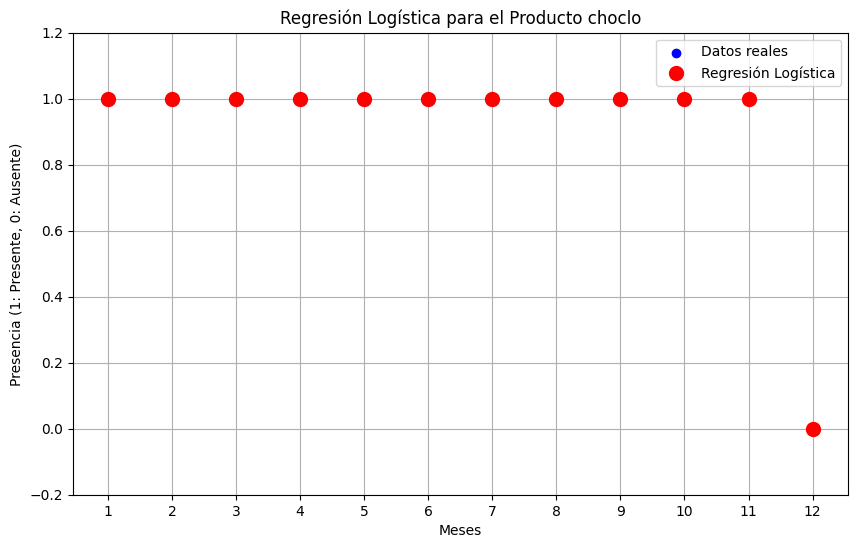


Resultados para el producto 'lechuga':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



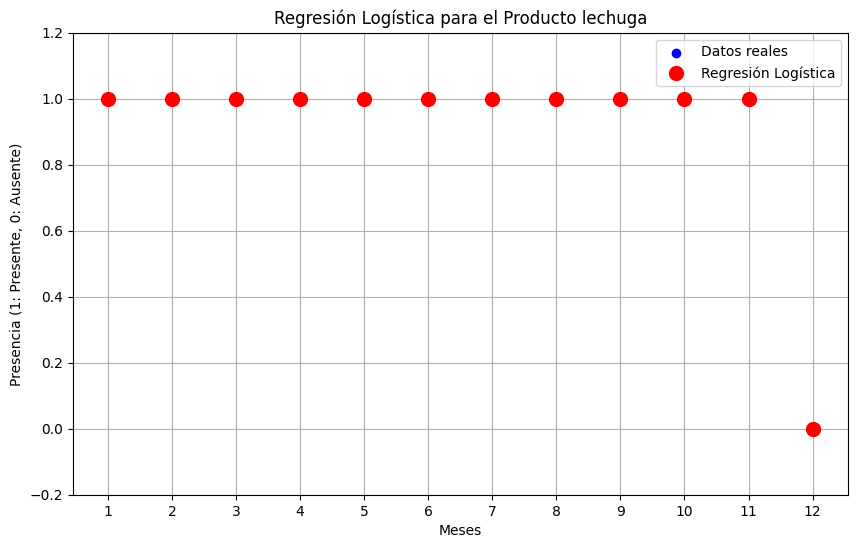


Resultados para el producto 'papa':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



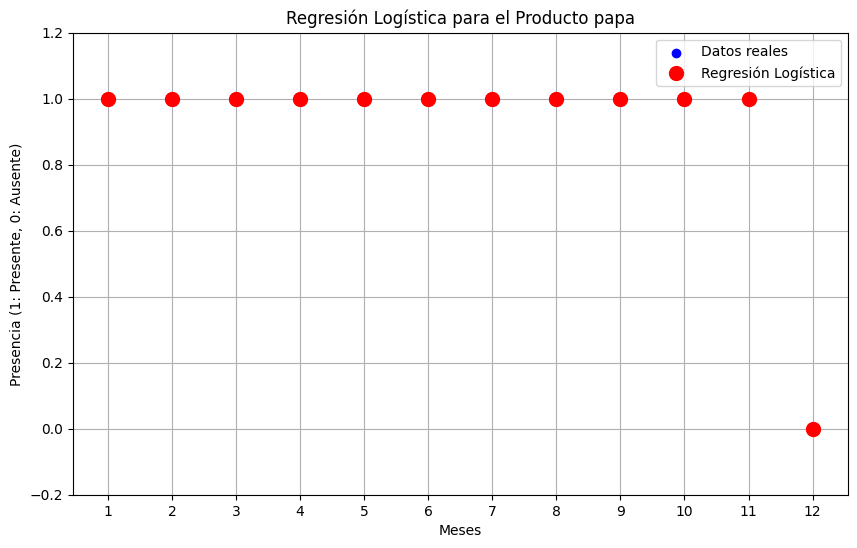


Resultados para el producto 'pimiento':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



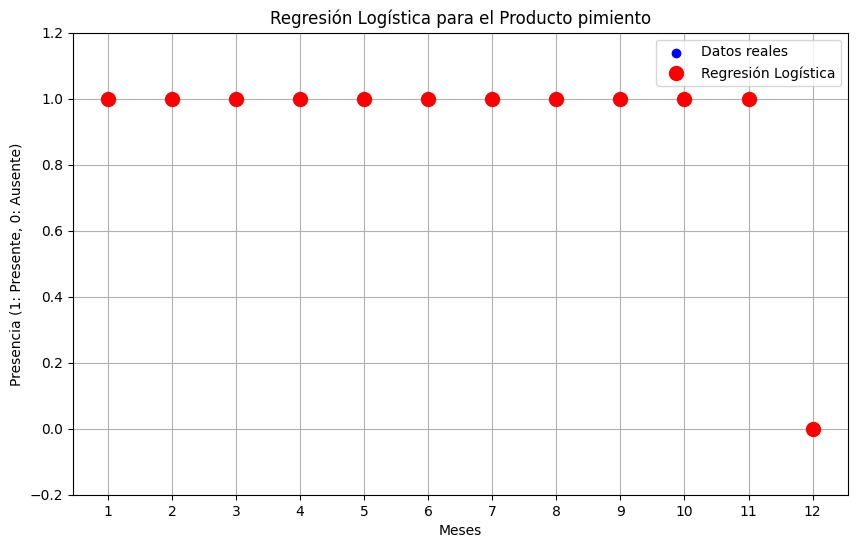


Resultados para el producto 'radicheta':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



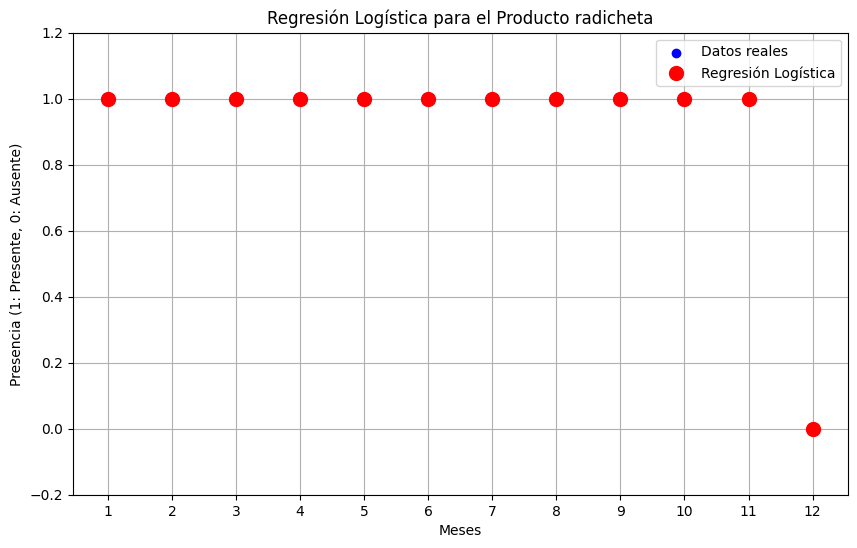


Resultados para el producto 'repollo':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



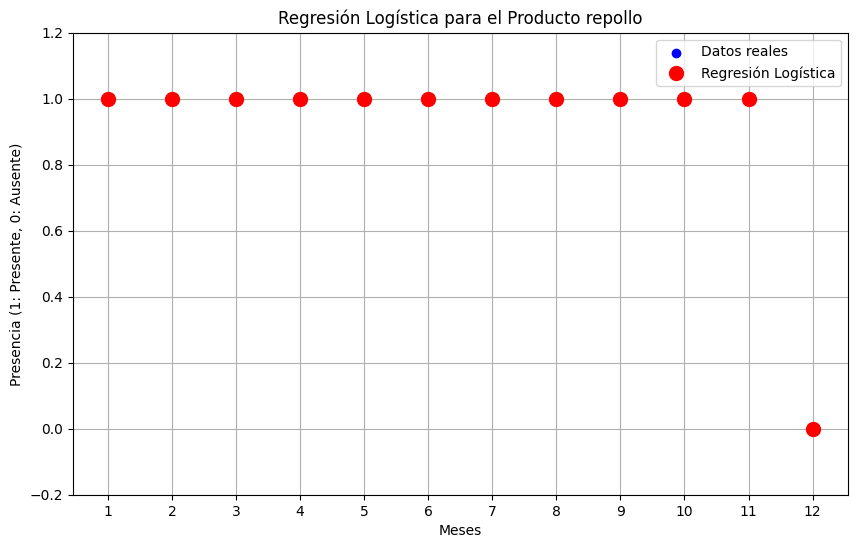


Resultados para el producto 'tomate':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



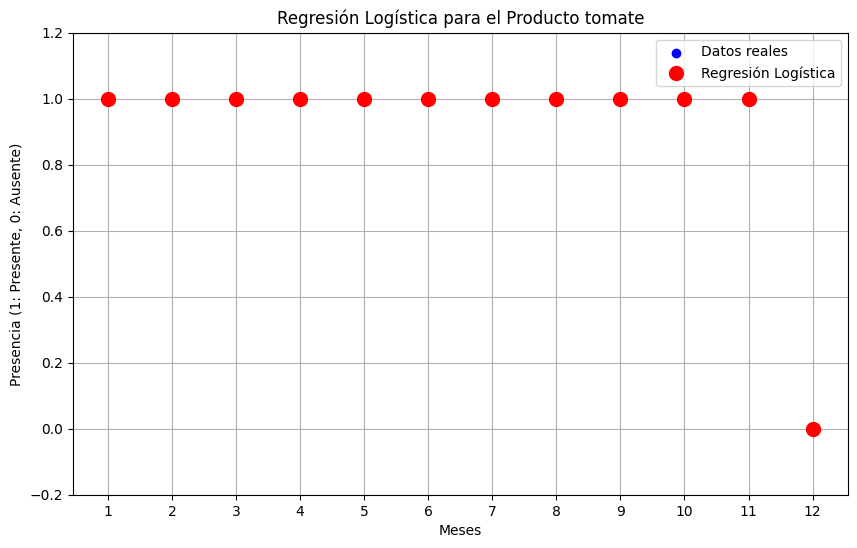


Resultados para el producto 'zanahoria':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



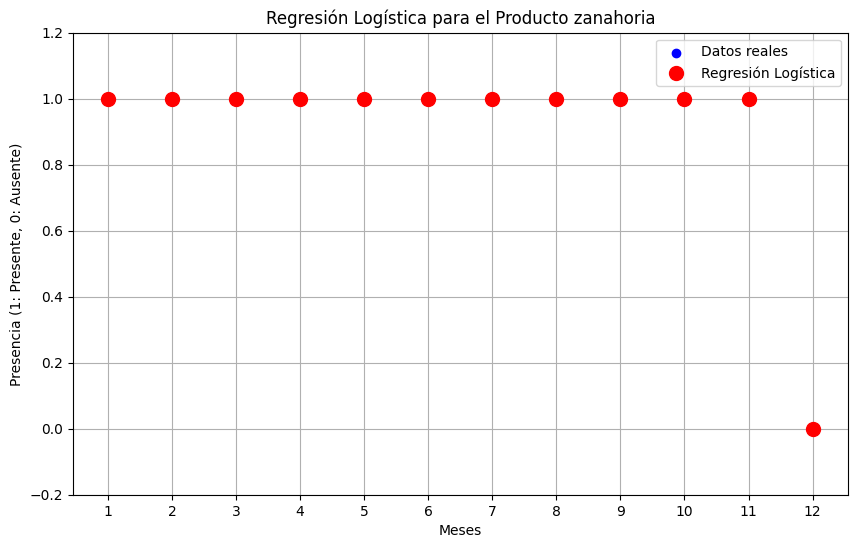


Resultados para el producto 'zapallito':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



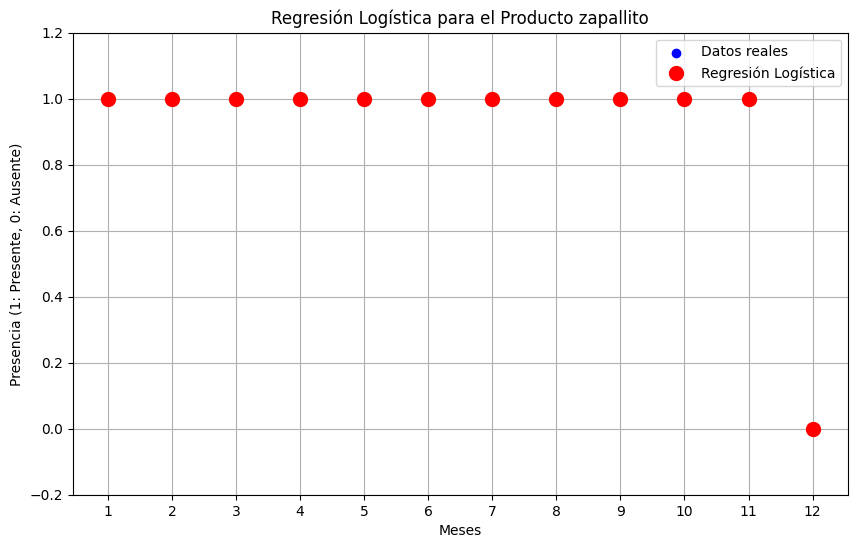


Resultados para el producto 'zapallo':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está AUSENTE



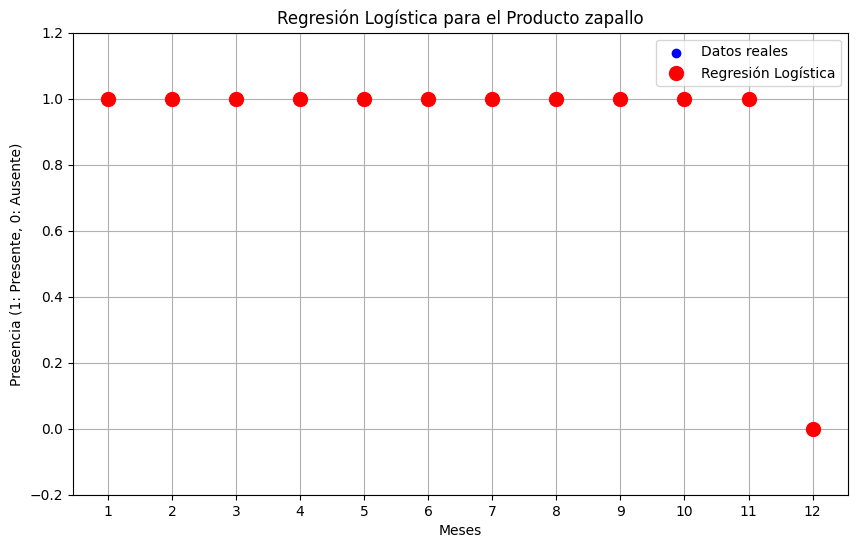


Resultados para el producto 'palta':
En el mes 1, estimamos que está AUSENTE
En el mes 2, estimamos que está AUSENTE
En el mes 3, estimamos que está AUSENTE
En el mes 4, estimamos que está AUSENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está PRESENTE



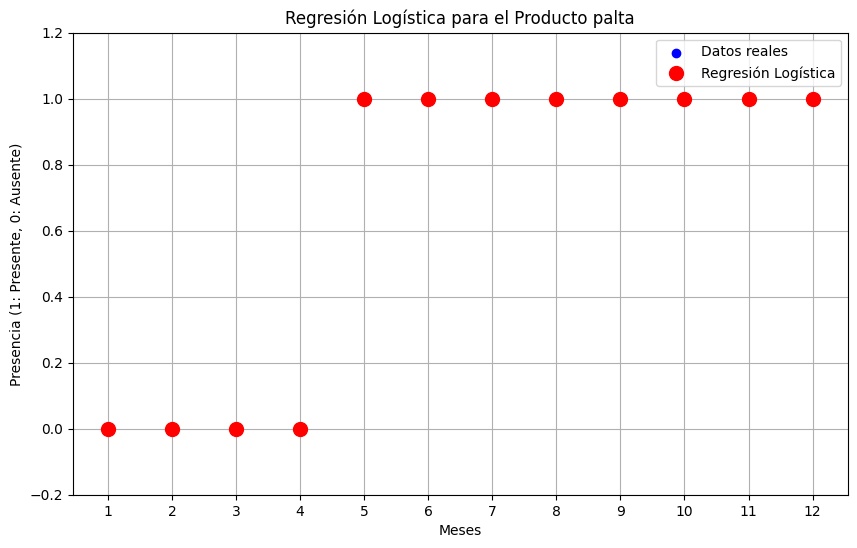

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

productos_unicos = df_mercado_sinNa['producto'].unique()
meses_unicos = df_mercado_sinNa['mesnum'].unique()

# Crea un diccionario para rastrear la presencia de productos en cada mes
meses_x_productos = {}

# Itera sobre los productos y meses únicos
for producto in productos_unicos:
    presencia_meses = []
    for mes in meses_unicos:
        # Comprueba si el producto está presente en ese mes
        if df_mercado_sinNa[(df_mercado_sinNa['producto'] == producto) & (df_mercado_sinNa['mesnum'] == mes)].shape[0] > 0:
            presencia_meses.append(1)
        else:
            presencia_meses.append(0)
    meses_x_productos[producto] = presencia_meses

# Convierte el diccionario en un DataFrame
df_meses_x_productos = pd.DataFrame(meses_x_productos)

# Elimina los productos de la lista generada que sean todos 1
df_meses_x_productos = df_meses_x_productos.loc[:, (df_meses_x_productos != 1).any()]

productos_unicos = df_meses_x_productos.columns
nuevos_meses_x_productos = df_meses_x_productos.copy()

# Itera sobre los productos
for producto in productos_unicos:
    y = df_meses_x_productos[producto]
    X = df_meses_x_productos.drop(producto, axis=1)

    if X.shape[1] > 0:
        modelo = LogisticRegression(solver='liblinear')
        modelo.fit(X, y)
        predicciones = modelo.predict(nuevos_meses_x_productos.drop(producto, axis=1))

        print(f"Resultados para el producto '{producto}':")
        for mes, presencia in enumerate(predicciones, start=1):
            if presencia == 1:
                print(f"En el mes {mes}, estimamos que está PRESENTE")
            else:
                print(f"En el mes {mes}, estimamos que está AUSENTE")

        print()

        # Crea el gráfico
        plt.figure(figsize=(10, 6))
        plt.scatter(range(1, len(y) + 1), y, color='blue', label='Datos reales')
        plt.plot(range(1, len(predicciones) + 1), predicciones, 'ro', markersize=10, label='Regresión Logística')
        plt.xlabel('Meses')
        plt.ylabel('Presencia (1: Presente, 0: Ausente)')
        plt.legend()
        plt.title(f'Regresión Logística para el Producto {producto}')
        plt.ylim([-0.2, 1.2])
        plt.xticks(range(1, len(y) + 1))
        plt.grid(True)
        plt.show()
        print()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Lista para almacenar los resultados de la regresión logística
resultados_logistica = {}

# Itera sobre los productos
for producto in productos_unicos:
    # Etiquetas reales
    y_real = df_meses_x_productos[producto]

    # Datos de entrada (X) para el producto actual (el producto se elimina de la tabla)
    X = df_meses_x_productos.drop(producto, axis=1)

    # Verifica si hay suficientes valores para realizar la regresión logística
    if X.shape[1] > 0:
        # creo un modelo para el producto actual en el ciclo
        modelo = LogisticRegression(solver='liblinear')

        # entreno el modelo
        modelo.fit(X, y_real)

        # Me aseguro que nuevos_meses_x_productos tenga las mismas columnas que X
        nuevos_meses_x_productos_producto = nuevos_meses_x_productos[X.columns]

        # hago las predicciones para el producto actual del ciclo
        predicciones = modelo.predict(nuevos_meses_x_productos_producto)

        # calculo las métricas
        accuracy = accuracy_score(y_real, predicciones)
        recall = recall_score(y_real, predicciones)
        precision = precision_score(y_real, predicciones)

        # calculo la matriz de confusión
        cm = confusion_matrix(y_real, predicciones)

        # obtengo los valores de la matriz de confusión
        verdaderos_negativos = cm[0, 0]
        falsos_positivos = cm[0, 1]

        # Calculo la especificidad
        especificidad = verdaderos_negativos / (verdaderos_negativos + falsos_positivos)

        # imprimo todas las métricas Exactitud, Sensibilidad y Especificidad
        print(f"Resultados para el producto '{producto}':")
        for mes, presencia in enumerate(predicciones, start=1):
            if presencia == 1:
                print(f"En el mes {mes}, estimamos que está PRESENTE")
            else:
                print(f"En el mes {mes}, estimamos que está AUSENTE")
        print(f"Exactitud (Accuracy): {accuracy:.2f}")
        print(f"Sensibilidad (Recall): {recall:.2f}")
        print(f"Especificidad: {especificidad:.2f}")
        print(f"Matriz de Confusión:")
        print(cm)

        resultados_logistica[producto] = {
            "accuracy": accuracy,
            "recall": recall,
            "precision": precision,
            "especificidad": especificidad,
        }

        print()  # Línea en blanco que separa los resultados escritos por pantalla

Resultados para el producto 'anana':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que está PRESENTE
En el mes 9, estimamos que está PRESENTE
En el mes 10, estimamos que está PRESENTE
En el mes 11, estimamos que está PRESENTE
En el mes 12, estimamos que está PRESENTE
Exactitud (Accuracy): 0.83
Sensibilidad (Recall): 1.00
Especificidad: 0.00
Matriz de Confusión:
[[ 0  2]
 [ 0 10]]

Resultados para el producto 'pomelo':
En el mes 1, estimamos que está PRESENTE
En el mes 2, estimamos que está PRESENTE
En el mes 3, estimamos que está PRESENTE
En el mes 4, estimamos que está PRESENTE
En el mes 5, estimamos que está PRESENTE
En el mes 6, estimamos que está PRESENTE
En el mes 7, estimamos que está PRESENTE
En el mes 8, estimamos que 

In [ ]:
#                   Realidad Positiva  Realidad Negativa
# Predicción Positiva       TP               FP
# Predicción Negativa       FN               TN

Conclusion de este análisis,
En este análisis queríamos comprobar la disponibilidad de la fruta y verdura a lo largo del tiempo.

Al aplicar k-fold y ver la matriz de confusión ,podémos observar que la cantidad de datos son insuficientes para aplicar un modelo por producto, hay valores atípicos en los precios por producto, hay productos como el de "palta" o "ciruela" que se acercan bastante a un modelo bien aplicado. La pérdida en cuanto a la cantidad de datos de cada producto por mes pudo haber afectado al análisis, haciendolo inviable.

##Data Frame 'df'

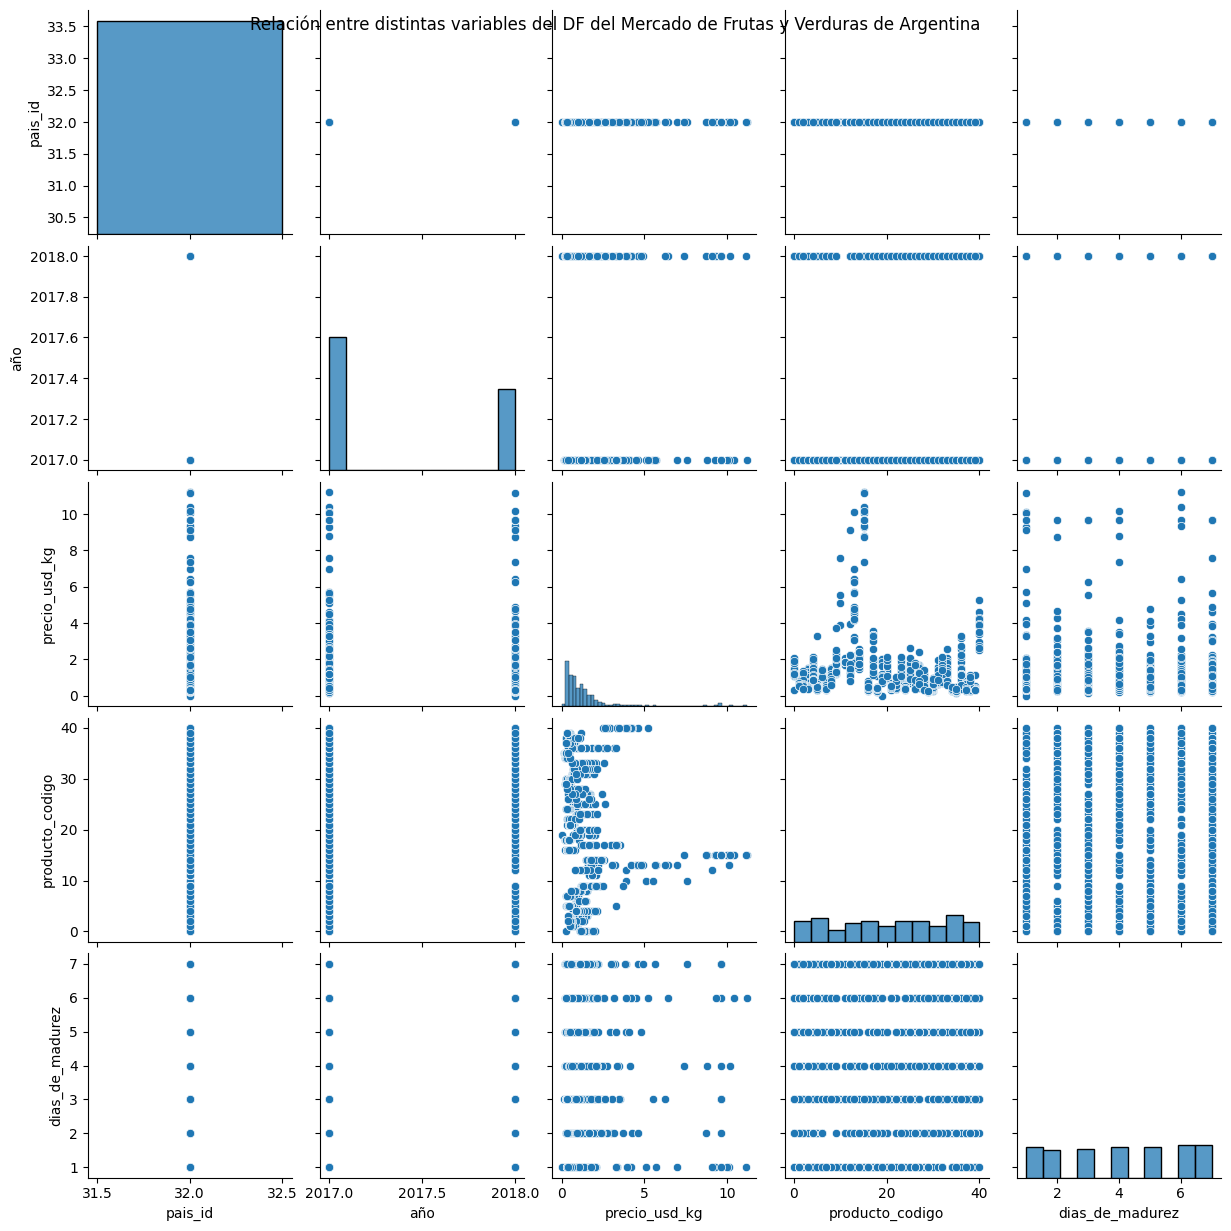

In [ ]:
sns.pairplot(df)
plt.suptitle("Relación entre distintas variables del DF del Mercado de Frutas y Verduras de Argentina")
plt.show()

<ipython-input-49-d405f9411843>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


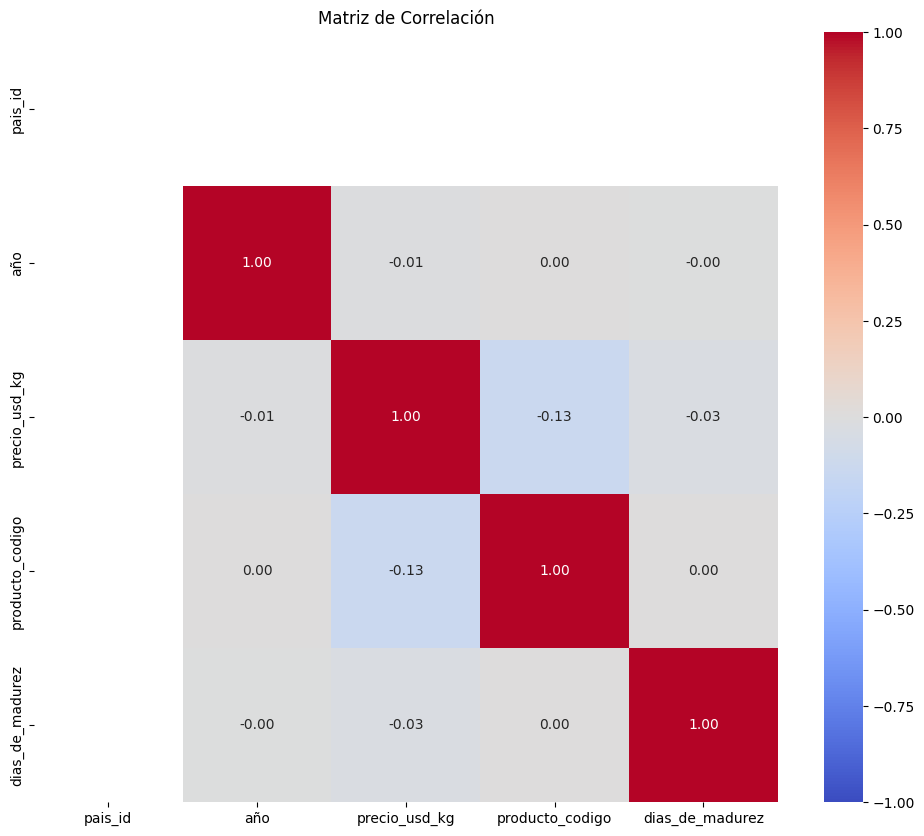

In [ ]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1,
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

plt.title('Matriz de Correlación')
plt.show()

## DEARROLLO Y EVALUACIÓN DEL MODELO PREDICTIVO


In [ ]:
df.columns

Index(['pais_id', 'pais', 'mercado', 'año', 'mes', 'producto', 'variedad',
       'origen', 'precio_usd_kg', 'moneda_cod', 'moneda', 'fecha',
       'producto_codigo', 'dias_de_madurez'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['producto_codigo', 'dias_de_madurez']]
Y = df['precio_usd_kg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

Error cuadrático medio: 2.07


In [ ]:
import pandas as pd
import statsmodels.api as sm

X = df[['producto_codigo', 'dias_de_madurez']]
Y = df['precio_usd_kg']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_usd_kg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.797
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           0.000442
Time:                        01:07:06   Log-Likelihood:                -1593.3
No. Observations:                 828   AIC:                             3193.
Df Residuals:                     825   BIC:                             3207.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8470      0.163     

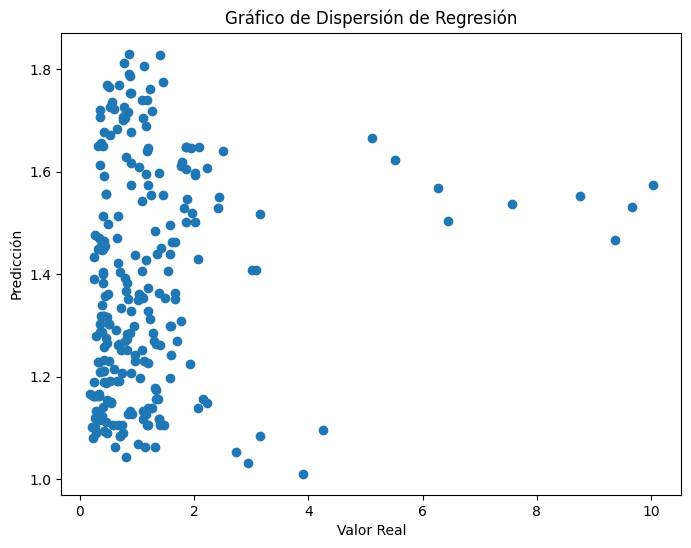

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Gráfico de Dispersión de Regresión")
plt.show()


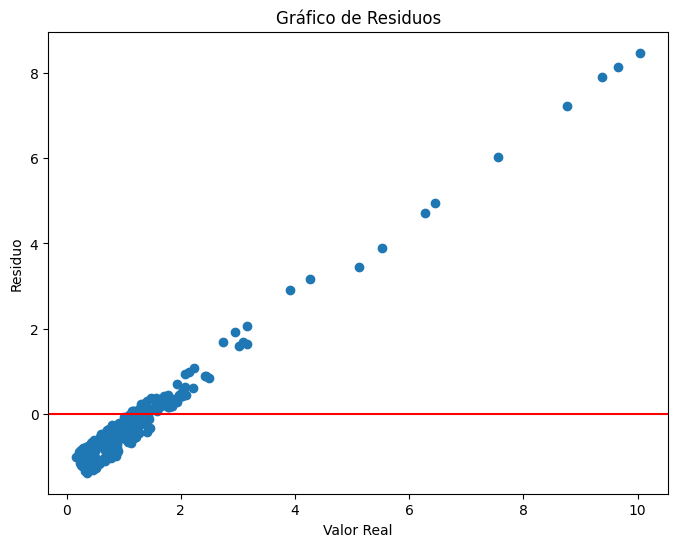

In [ ]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Valor Real")
plt.ylabel("Residuo")
plt.title("Gráfico de Residuos")
plt.show()


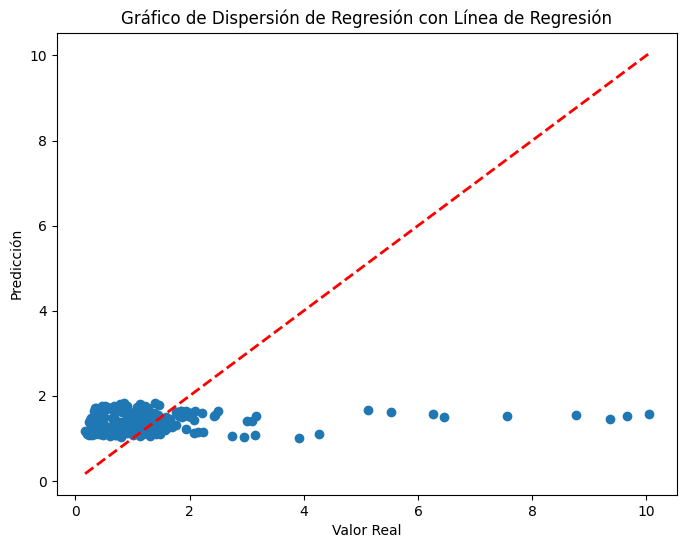

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Gráfico de Dispersión de Regresión con Línea de Regresión")

# Agregar la línea de regresión
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', lw=2, linestyle='--')
plt.show()


## K-FOLD

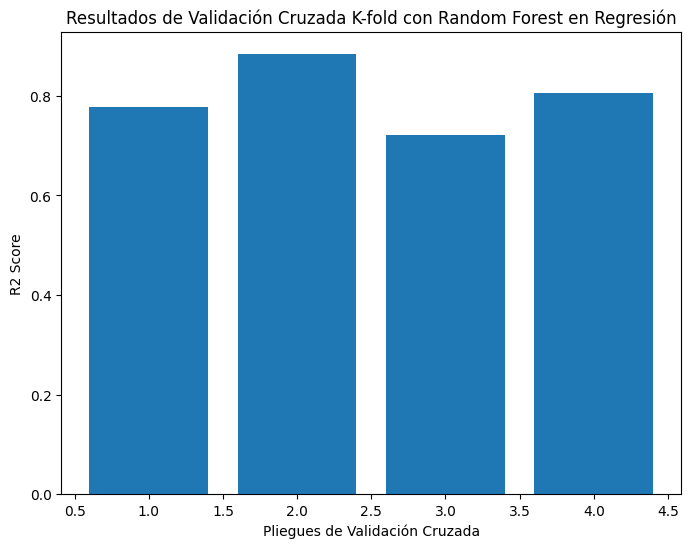

R2 Score promedio: 0.80
Desviación estándar del R2 Score: 0.06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

cv = KFold(n_splits=4, shuffle=True, random_state=42)

scores = []

model = RandomForestRegressor(n_estimators=100, random_state=42)

for train_index, test_index in cv.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores) + 1), scores)
plt.xlabel('Pliegues de Validación Cruzada')
plt.ylabel('R2 Score')
plt.title('Resultados de Validación Cruzada K-fold con Random Forest en Regresión')
plt.show()

mean_r2 = np.mean(scores)
std_r2 = np.std(scores)
print(f"R2 Score promedio: {mean_r2:.2f}")
print(f"Desviación estándar del R2 Score: {std_r2:.2f}")

##Data Frame 'data'

Gráfica de correlación

                       año  precio_usd_kg  codigo_mes  producto_encoded
año               1.000000      -0.012858   -0.301342         -0.021123
precio_usd_kg    -0.012858       1.000000   -0.004377         -0.107898
codigo_mes       -0.301342      -0.004377    1.000000          0.013886
producto_encoded -0.021123      -0.107898    0.013886          1.000000


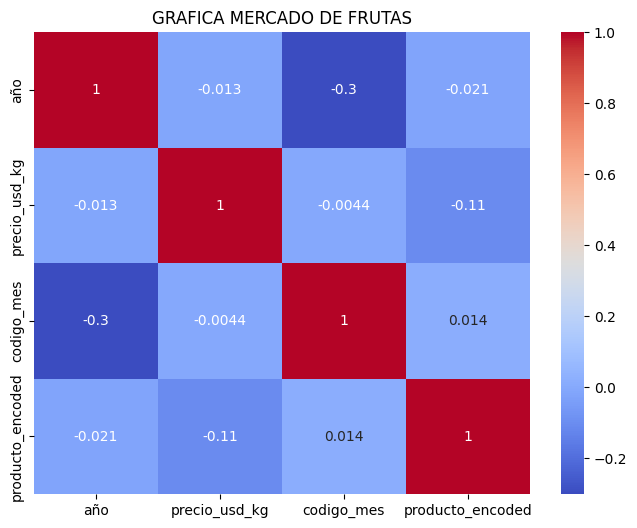

In [ ]:
import seaborn as sns

#GRAFICA DE CORRELACION
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("GRAFICA MERCADO DE FRUTAS")
plt.show()



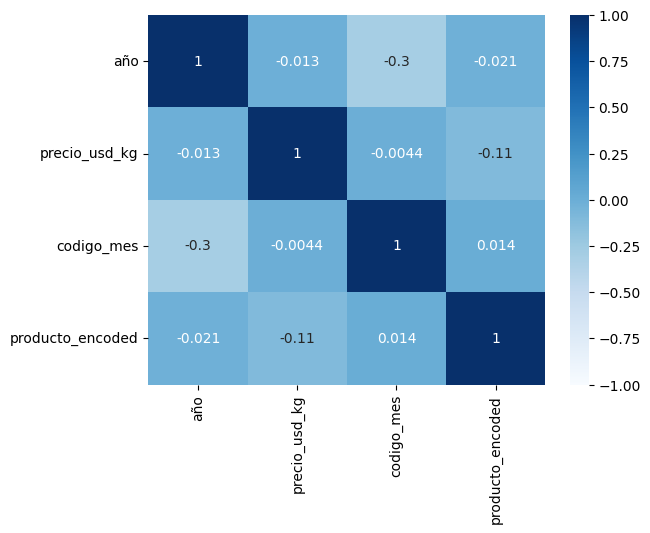

In [ ]:
# Visualizacion alternativa de la correlacion como heatmap
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap="Blues")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear un objeto de modelo de regresión lineal
modelo = LinearRegression()

X = list(zip(data['producto_encoded'],data['codigo_mes']))
#X.columns = ['producto_encoded']  # Asignar un nombre a la característica

y = data['precio_usd_kg']  # y precio en dólares


# Entrenar el modelo con los datos
modelo.fit(X,y)

# Crear un array aleatorio de frutas con el código asignado
# Establecer una semilla para obtener resultados reproducibles
np.random.seed(123)

n_dimensiones = 50
productos_a_predecir_valor = np.random.choice(data['producto_encoded'], n_dimensiones)  # Nuevas cantidades de frutas para predecir su precio según producto
rango_mes_a_predecir = np.random.choice(data['codigo_mes'],  n_dimensiones)

# Apila las dos características en un solo array bidimensional
caracteristicas_a_predecir = list(zip(productos_a_predecir_valor,rango_mes_a_predecir))

# Realiza la predicción
precio_prediccion = modelo.predict(caracteristicas_a_predecir)



Dado que  se realiza una regresión lineal múltiple con dos características en el eje x (producto_encoded y codigo_mes), no es posible representar los datos en un gráfico de dispersión 2D simple. En lugar de eso, se crea un gráfico tridimensional (3D)


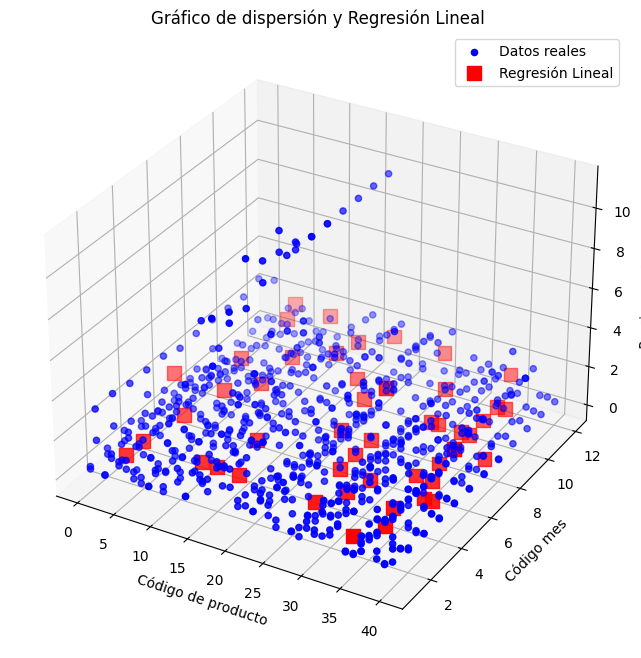

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión con los datos originales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['producto_encoded'], data['codigo_mes'], y, c='blue', label='Datos reales')

# Agregar los resultados de la regresión lineal en rojo
ax.scatter(productos_a_predecir_valor, rango_mes_a_predecir, precio_prediccion, c='red', marker='s', s=100, label='Regresión Lineal')


# Configurar etiquetas y título
ax.set_xlabel('Código de producto')
ax.set_ylabel('Código mes')
ax.set_zlabel('Precio en dólares')
plt.title('Gráfico de dispersión y Regresión Lineal')

# Mostrar la leyenda
ax.legend()

plt.show()


In [ ]:
# Realiza la predicción
precio_prediccion = modelo.predict(caracteristicas_a_predecir)

# Obtener el nombre del producto a partir del valor numérico
productos_a_predecir_nombre = le.inverse_transform(productos_a_predecir_valor)

# Imprimir las predicciones con nombres de productos
for i in range(len(productos_a_predecir_nombre)):
    producto = productos_a_predecir_nombre[i]
    mes = rango_mes_a_predecir[i]
    precio_estimado = precio_prediccion[i]
    print(f"Para el producto {producto}, en el mes {mes}, el precio estimado es de ${precio_estimado:.2f}")



Para el producto tomate, en el mes 3, el precio estimado es de $1.14
Para el producto arveja, en el mes 2, el precio estimado es de $1.61
Para el producto tomate, en el mes 10, el precio estimado es de $1.13
Para el producto arveja, en el mes 8, el precio estimado es de $1.60
Para el producto ciruela, en el mes 10, el precio estimado es de $1.46
Para el producto pimiento, en el mes 8, el precio estimado es de $1.21
Para el producto acelga, en el mes 6, el precio estimado es de $1.68
Para el producto banana, en el mes 4, el precio estimado es de $1.59
Para el producto apio, en el mes 12, el precio estimado es de $1.61
Para el producto tomate, en el mes 7, el precio estimado es de $1.14
Para el producto uva, en el mes 10, el precio estimado es de $1.12
Para el producto zapallo, en el mes 7, el precio estimado es de $1.08
Para el producto epinaca, en el mes 4, el precio estimado es de $1.44
Para el producto uva, en el mes 5, el precio estimado es de $1.12
Para el producto choclo, en el me

## Métrica de evaluación para LinearRegression




In [ ]:
# Aplicar k-fold cross-validation con 5 folds
scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el MSE promedio (negativo porque cross_val_score devuelve valores negativos)
mse_promedio = -scores.mean()

# Imprimir el MSE promedio
print(f'Mean Squared Error promedio: {mse_promedio}')

Mean Squared Error promedio: 2.771973999856401


#Regresión lineal utilizando librería statsmodels

In [ ]:
import statsmodels.api as sm

# Variables predictoras (X) y variable dependiente (y)
X = data[['producto_encoded', 'codigo_mes']]
y = data['precio_usd_kg']

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          precio_usd_kg   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.862
Date:                Mon, 23 Oct 2023   Prob (F-statistic):            0.00796
Time:                        01:08:07   Log-Likelihood:                -1596.2
No. Observations:                 828   AIC:                             3198.
Df Residuals:                     825   BIC:                             3213.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.6892      0.154  

In [ ]:
y_pred = model.predict(X)
#predicted_salary = pd.Series(data = y_pred, name='PredictedSalary')

data['PredictedCANTIDAD'] = y_pred
data.head()

,año,mes,producto,variedad,origen,precio_usd_kg,codigo_mes,producto_encoded,PredictedCANTIDAD
0,2017,Enero,anana,Perola,Brasil,1.22,1,3,1.642554
1,2017,Enero,banana,Cavdich,Ecuador,0.53,1,6,1.597378
2,2017,Enero,pomelo,Star Ruby,Argentina,0.86,1,32,1.205846
3,2017,Enero,limón,Eureka,Argentina,1.52,1,21,1.371494
4,2017,Enero,manzana,Granny Smith,Argentina,1.84,1,23,1.341376


In [ ]:
# Mediante métricas de performance (R2 y RMSE)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R2=", r2_score(y, y_pred))
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("RMSE=", rmse)

R2= 0.0116502152720378
RMSE= 1.6633537158773388


## Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.

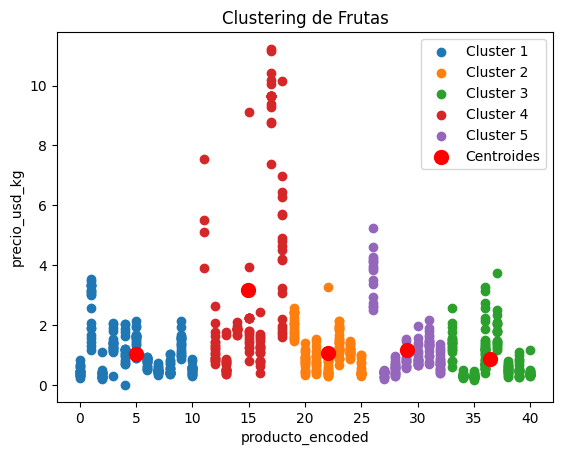

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las características para el clustering
X = data[['producto_encoded', 'precio_usd_kg']]

# Elegir el número de clústeres
n_clusters = 5

# Crear un modelo K-Means con el número de clústeres especificado
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)

# Ajustar el modelo
kmeans.fit(X)

# Obtener las etiquetas de clúster asignadas a cada muestra
labels = kmeans.labels_

# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = kmeans.labels_

# Visualiza los clústeres
for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['producto_encoded'], cluster_data['precio_usd_kg'], label=f'Cluster {cluster + 1}')

# Visualiza los centroides de los clústeres
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroides')

plt.xlabel('producto_encoded')
plt.ylabel('precio_usd_kg')
plt.legend()
plt.title('Clustering de Frutas')
plt.show()


##Conclusión para este análisis

## Interpretación del resultado para el modelo de Regresión Lineal con LinearRegression:

    Dep. Variable: Indica la variable dependiente en el modelo, que es 'precio_usd_kg'.

    Model: Muestra el tipo de modelo ajustado, que es "OLS" (Ordinary Least Squares, es decir, Mínimos Cuadrados Ordinarios), que es el método utilizado para ajustar el modelo.

    Method: Muestra el método utilizado, que es "Least Squares" (Mínimos Cuadrados).

    Date y Time: La fecha y la hora en las que se ajustó el modelo.

    No. Observations: Muestra el número de observaciones en el modelo, que es 828.

    Df Residuals: Representa el número de grados de libertad de los residuos (errores), que es 825.

    Df Model: Indica el número de grados de libertad del modelo, que es 2, ya que tienes dos variables predictoras ('producto_encoded' y 'codigo_mes').

    R-squared: El coeficiente de determinación (R-cuadrado) es 0.012. Representa la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. En este caso, el modelo explica el 1.2% de la variabilidad en 'precio_usd_kg', lo que sugiere que las variables predictoras no explican mucho de la variabilidad en el precio.

    Adj. R-squared: Es el R-cuadrado ajustado y tiene en cuenta el número de predictores en el modelo. En este caso, es 0.009.

    F-statistic: Es la estadística F y mide la significancia global del modelo. En este caso, el valor es 4.862 y se utiliza para realizar una prueba de hipótesis sobre si al menos uno de los coeficientes de las variables predictoras es diferente de cero. El valor p asociado con esta estadística se muestra a continuación.

    Prob (F-statistic): Es el valor p asociado con la estadística F. Si es menor que un nivel de significación (por ejemplo, 0.05), el modelo en su conjunto es significativo. En este caso, el valor p es 0.00796, lo que sugiere que el modelo en su conjunto es significativo a un nivel de significación del 0.05.

    Coef: Muestra los coeficientes estimados para las variables del modelo. Tienes tres coeficientes en este caso: el intercepto (const), 'producto_encoded' y 'codigo_mes'. Estos coeficientes representan la relación entre cada variable y la variable dependiente.

    std err: Representa el error estándar de los coeficientes estimados. Cuanto más pequeño sea este valor, más precisa será la estimación.

    t: Es la estadística t, que se utiliza para realizar pruebas de hipótesis sobre si un coeficiente es diferente de cero. Cuanto mayor sea el valor absoluto de t, más significativo es el coeficiente.

    P>|t|: Es el valor p asociado con la estadística t. Indica si un coeficiente es estadísticamente significativo. En este caso, 'producto_encoded' es significativo a un nivel de significación del 0.05, pero 'codigo_mes' no lo es.

    [0.025 0.975]: Estos intervalos muestran el intervalo de confianza del 95% para los coeficientes. Si el intervalo incluye el valor cero, esto sugiere que el coeficiente no es significativo.

    Omnibus: Proporciona el resultado de la prueba de omnibus, que evalúa si los residuos se distribuyen normalmente. En este caso, el valor p es cercano a cero, lo que sugiere que los residuos no siguen una distribución normal.

    Durbin-Watson: Muestra la estadística de Durbin-Watson, que evalúa la autocorrelación de los residuos. Un valor cercano a 2 indica que no hay autocorrelación significativa en los residuos.

    Prob(Omnibus): Proporciona el valor p asociado con la prueba de omnibus. Al igual que el resultado de la prueba omnibus, este valor sugiere que los residuos no se distribuyen normalmente.

    Jarque-Bera (JB): Proporciona el resultado de la prueba de Jarque-Bera, que también evalúa la normalidad de los residuos. El valor p es cercano a cero, lo que sugiere que los residuos no se distribuyen normalmente.

    Skew: Muestra el sesgo de los residuos.

    Kurtosis: Muestra la curtosis de los residuos.

    Cond. No.: Es el número de condición, que evalúa la multicolinealidad. Valores grandes pueden indicar multicolinealidad.

En resumen, el modelo proporciona información sobre la calidad del ajuste, la significancia de las variables predictoras y otras estadísticas relacionadas con el modelo de regresión lineal. En este caso, el modelo tiene un R-cuadrado bajo, lo que sugiere que las variables predictoras no explican mucho de la variabilidad en la variable dependiente.

##Interpretación del resultado para el modelo de Regresión Lineal con Statsmodel

El coeficiente de determinación (R^2) indica la proporción de la variabilidad en la variable dependiente (en este caso, el precio) que es explicada por el modelo de regresión. En el caso, R^2 tiene un valor de aproximadamente 0.0117, lo que significa que solo alrededor del 1.17% de la variabilidad en el precio puede ser explicada por las variables predictoras (producto_encoded y codigo_mes) en el modelo. Esto sugiere que el modelo de regresión lineal no es muy efectivo para explicar o predecir el precio en función de estas dos variables.

El error cuadrático medio (RMSE) es una medida de cuán cerca están las predicciones del modelo de los valores reales. En este caso, RMSE tiene un valor de aproximadamente 1.6634. Esto significa que, en promedio, las predicciones del modelo tienen un error de aproximadamente 1.6634 unidades en la misma escala que la variable dependiente (precio). Cuanto menor sea el valor de RMSE, mejor será el ajuste del modelo a los datos.

Dado que el R^2 es bajo, y el RMSE es relativamente alto, el modelo de regresión lineal no es muy preciso para predecir el precio en función de las variables del dataset

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

1-Tener accesso a una mayor cantidad de información o relevamiento con mayor especifidad de datos relevamente para proporcionar un mejor análisis.

2-Al momento de intentar hacer análisis por tipos de productos y precios en sus meses. Tenemos datos insuficientes para generar un modelo.

3-Los datos generados en este trabajo integrador pueden utilizarse como modelo para seguir un objetivo de análisis pero no podrían reflejar la situación actual, lo que no permitiría podér ofrecer soluciones y mejoras.

4- Datos a tener en cuenta en un próximo relevamiento de datos, fecha de ingreso de los productos, fecha de salida y cantidad de venta del mismo, tasa de pérdida o scrap generado semanalmente o por día.
Proporcionar un conjunto mayor que 800 registros, dado que es el mercado central.

5-